In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train = train[train['GrLivArea'] <= 4000]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

In [5]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna('NA', inplace=True)
    else:
        train[col].fillna(0, inplace=True)

In [6]:
train['yr_since_renovation'] = (train['YrSold'] - train['YearRemodAdd'])

<AxesSubplot: xlabel='yr_since_renovation', ylabel='SalePrice'>

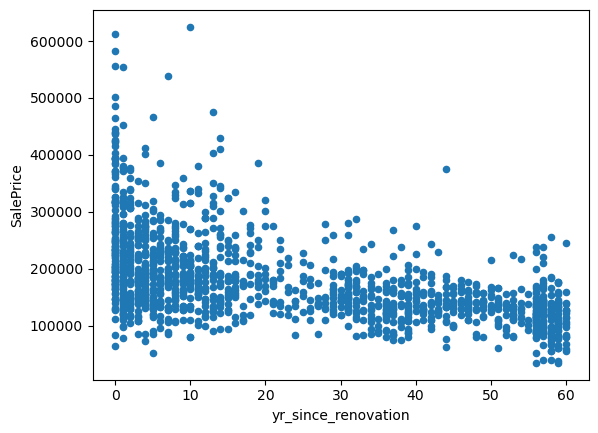

In [7]:
train.plot.scatter('yr_since_renovation', 'SalePrice', s=None, c=None)

<AxesSubplot: xlabel='MSSubClass', ylabel='SalePrice'>

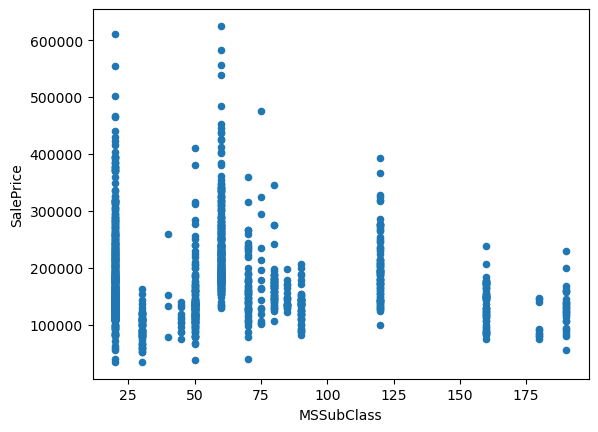

In [8]:
train.plot.scatter('MSSubClass', 'SalePrice')

In [9]:
train.drop('Alley', axis=1, inplace=True)

In [10]:
train.loc[(train['LotShape'].isin(['IR1', 'IR2', 'IR3'])), 'LotShape'] = 'IR'

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='LotShape'>

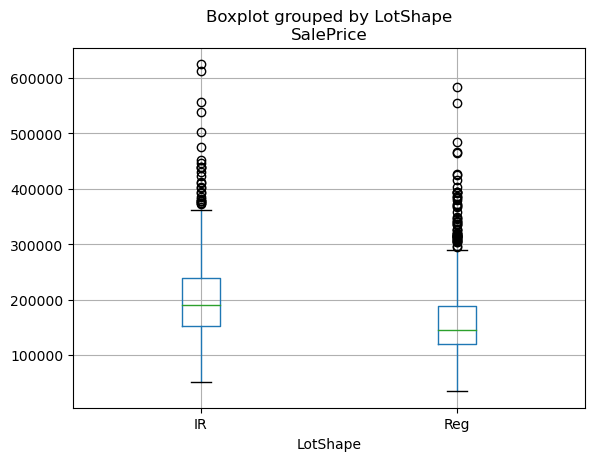

In [11]:
train.boxplot('SalePrice', by='LotShape')

In [12]:
train['LotShape'].value_counts()

Reg    925
IR     531
Name: LotShape, dtype: int64

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='LandContour'>

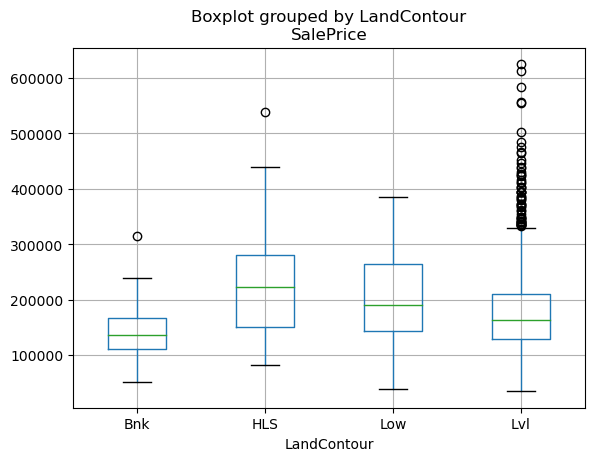

In [13]:
train.boxplot('SalePrice', by='LandContour')

In [14]:
train['LandContour'].value_counts()

Lvl    1309
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64

In [15]:
train.drop('LandContour', axis=1, inplace=True)

In [16]:
train['Utilities'].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
train.drop('Utilities', axis=1, inplace=True)

In [18]:
train['LotConfig'].value_counts()

Inside     1051
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='LotConfig'>

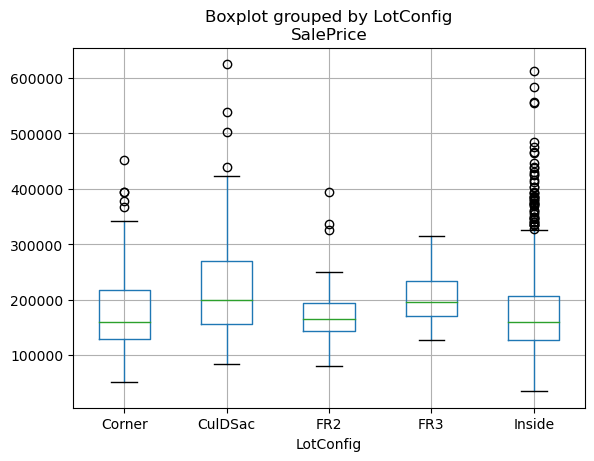

In [19]:
train.boxplot('SalePrice', by='LotConfig')

In [20]:
train.drop('LotConfig', axis=1, inplace=True)

Gtl    1378
Mod      65
Sev      13
Name: LandSlope, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='LandSlope'>

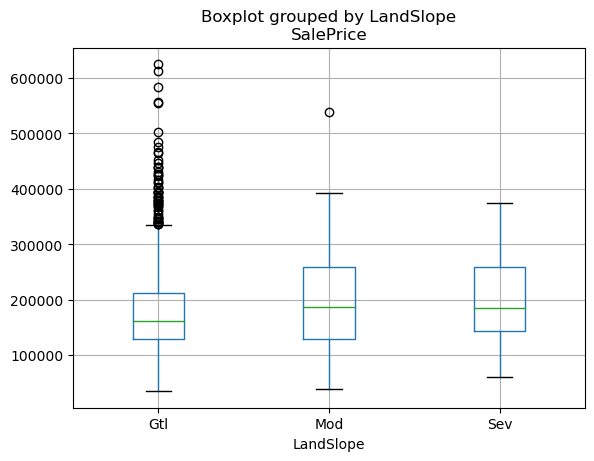

In [21]:
print(train['LandSlope'].value_counts())
train.boxplot('SalePrice', by='LandSlope')

In [22]:
train.drop('LandSlope', axis=1, inplace=True)

In [23]:
neighborhoods = (train.groupby('Neighborhood')['SalePrice']
                 .agg(['mean', 'median', 'count'])
                 .sort_values(by='median', ascending=False))

In [24]:
neighborhoods['count'] = (neighborhoods['count'] / neighborhoods['count'].sum()) * 500000

<AxesSubplot: xlabel='Neighborhood'>

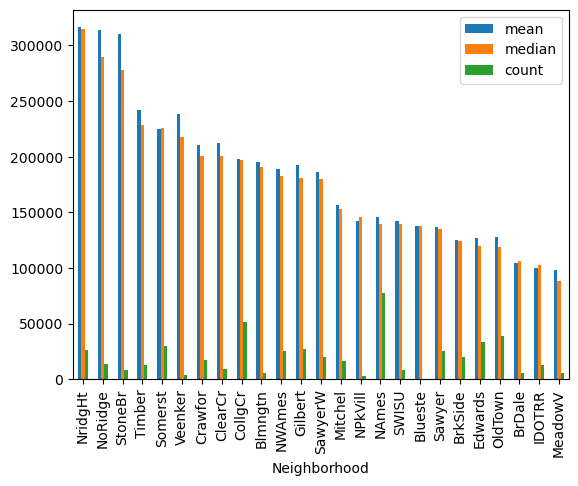

In [25]:
neighborhoods.plot(kind='bar')

In [26]:
neighborhoods.index

Index(['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Veenker',
       'Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert',
       'SawyerW', 'Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer',
       'BrkSide', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='Neighborhood')

In [27]:
#train.loc[(train['Neighborhood'].isin(['NridgHt', 'NoRidge', 'StoneBr'])), 'Neighborhood'] = 'One'
#train.loc[(train['Neighborhood'].isin(['Timber', 'Somerst', 'Veenker',
#       'Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert',
#       'SawyerW'])), 'Neighborhood'] = 'Two'
#train.loc[(train['Neighborhood'].isin(['Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer',
#       'BrkSide', 'Edwards', 'OldTown'])), 'Neighborhood'] = 'Three'
#train.loc[(train['Neighborhood'].isin(['BrDale', 'IDOTRR', 'MeadowV'])), 'Neighborhood'] = 'Four'

In [28]:
#print(train['Neighborhood'].value_counts())
#train.boxplot('SalePrice', by='Neighborhood')

Norm      1258
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Condition1'>

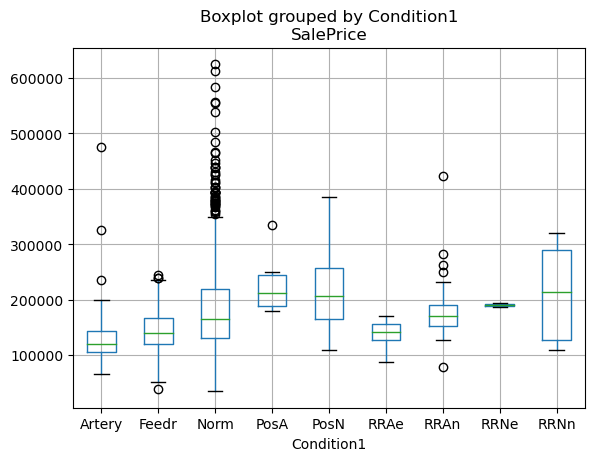

In [29]:
print(train['Condition1'].value_counts())
train.boxplot('SalePrice', by='Condition1')

Norm      1442
Feedr        6
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Condition2'>

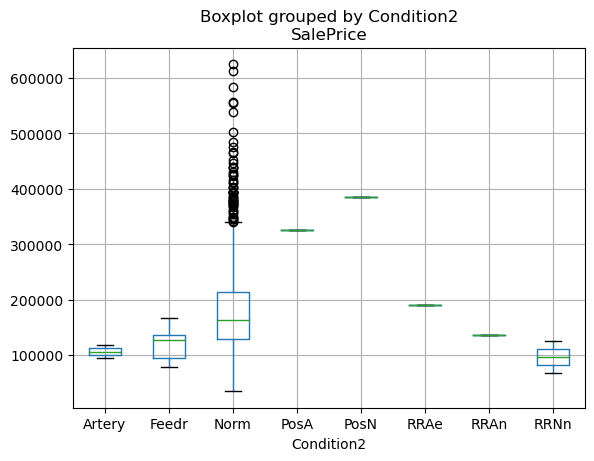

In [30]:
print(train['Condition2'].value_counts())
train.boxplot('SalePrice', by='Condition2')

In [31]:
train.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

1Fam      1216
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BldgType'>

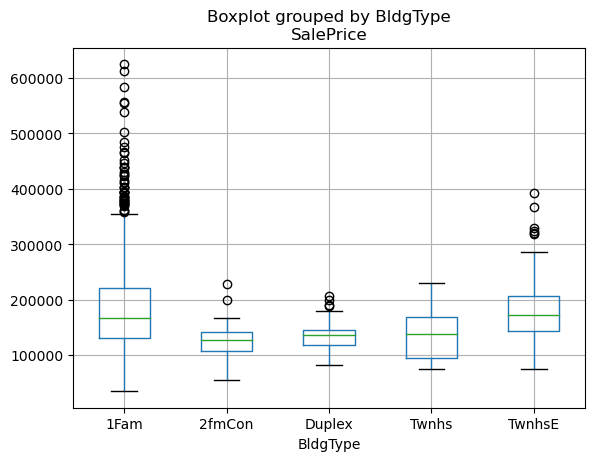

In [32]:
print(train['BldgType'].value_counts())
train.boxplot('SalePrice', by='BldgType')

In [33]:
train.drop('BldgType', axis=1, inplace=True)

1Story    726
2Story    441
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='HouseStyle'>

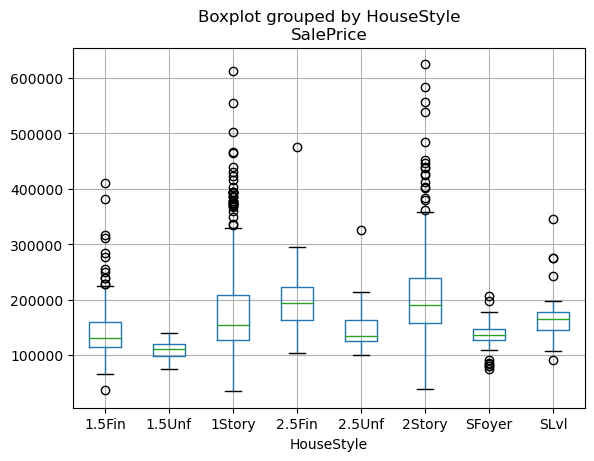

In [34]:
print(train['HouseStyle'].value_counts())
train.boxplot('SalePrice', by='HouseStyle')

In [35]:
train.drop('HouseStyle', axis=1, inplace=True)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     14
2       3
1       2
Name: OverallQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='OverallQual'>

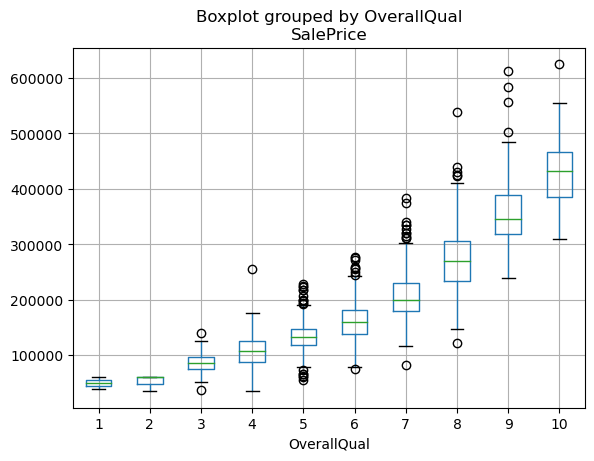

In [36]:
print(train['OverallQual'].value_counts())
train.boxplot('SalePrice', by='OverallQual')

5    818
6    251
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='OverallCond'>

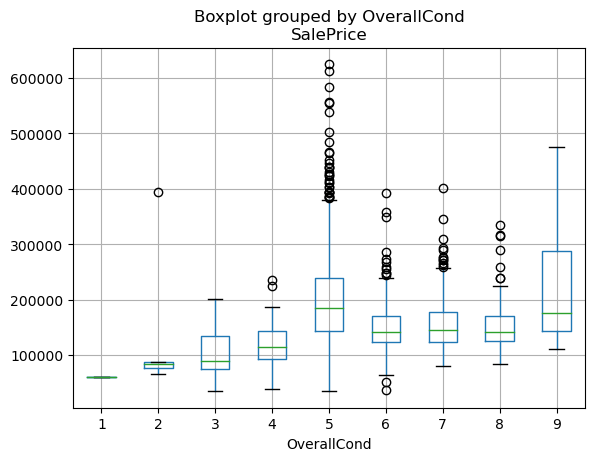

In [37]:
print(train['OverallCond'].value_counts())
train.boxplot('SalePrice', by='OverallCond')

In [38]:
train.drop('OverallCond', axis=1, inplace=True)

2006    67
2005    64
2004    54
2007    48
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='YearBuilt'>

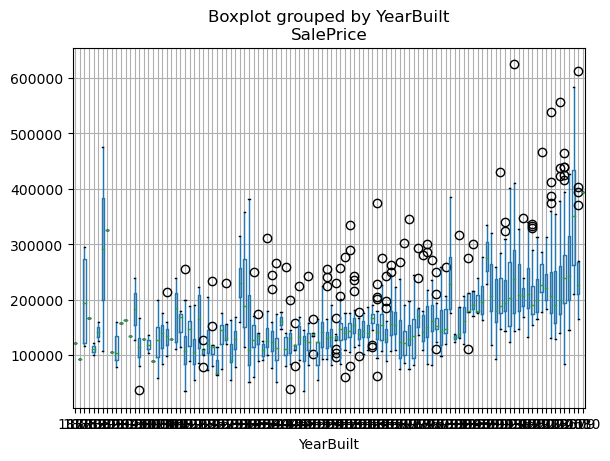

In [39]:
print(train['YearBuilt'].value_counts())
train.boxplot('SalePrice', by='YearBuilt')

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='YearRemodAdd'>

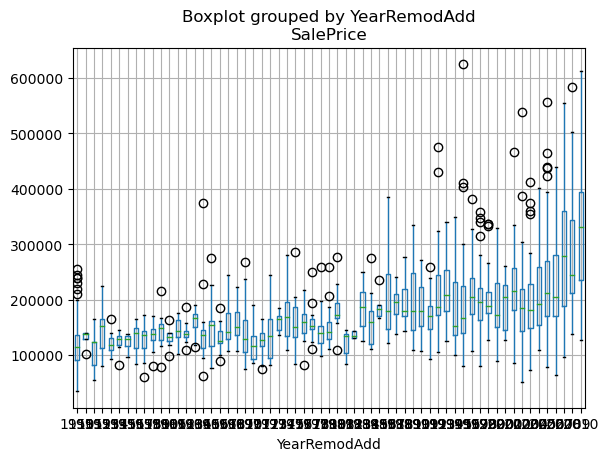

In [40]:
print(train['YearRemodAdd'].value_counts())
train.boxplot('SalePrice', by='YearRemodAdd')

In [41]:
train['yr_since_renovation'] = train['YrSold'] - train['YearRemodAdd']

0     123
1      87
4      63
3      53
56     52
     ... 
25      7
26      7
24      6
23      6
55      5
Name: yr_since_renovation, Length: 61, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='yr_since_renovation'>

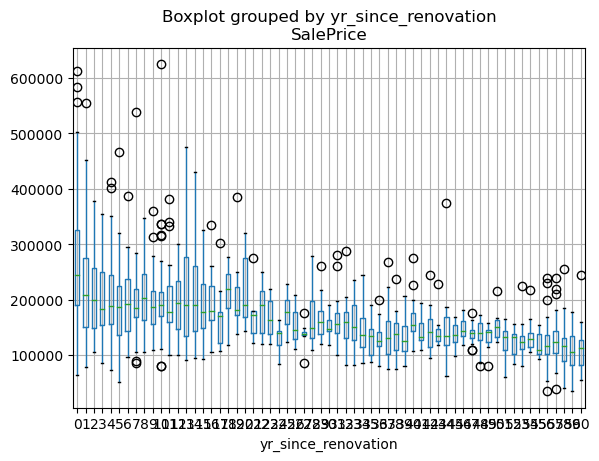

In [42]:
print(train['yr_since_renovation'].value_counts())
train.boxplot('SalePrice', by='yr_since_renovation')

In [43]:
train.drop(['YearRemodAdd', 'YearBuilt'], axis=1, inplace=True)

2009    338
2007    326
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='YrSold'>

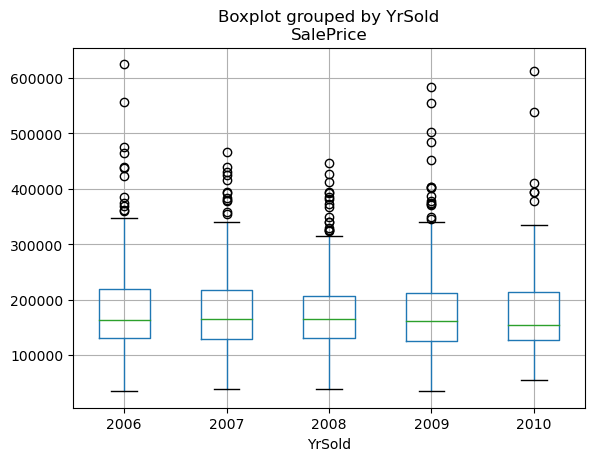

In [44]:
print(train['YrSold'].value_counts())
train.boxplot('SalePrice', by='YrSold')

6     253
7     233
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      56
2      52
Name: MoSold, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MoSold'>

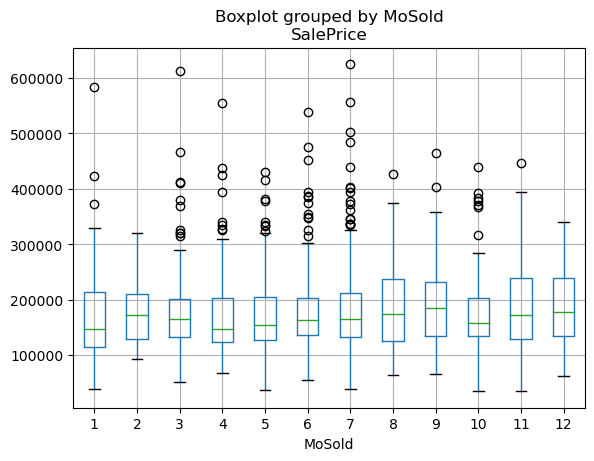

In [45]:
print(train['MoSold'].value_counts())
train.boxplot('SalePrice', by='MoSold')

In [46]:
train.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

Gable      1140
Hip         283
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='RoofStyle'>

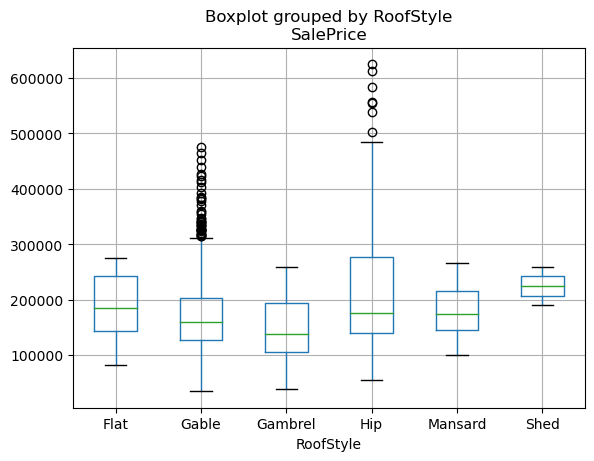

In [47]:
print(train['RoofStyle'].value_counts())
train.boxplot('SalePrice', by='RoofStyle')

In [48]:
train.drop('RoofStyle', axis=1, inplace=True)

CompShg    1432
Tar&Grv      11
WdShngl       5
WdShake       5
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='RoofMatl'>

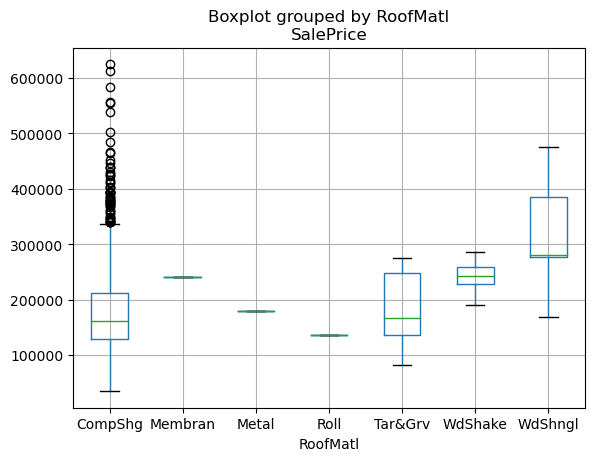

In [49]:
print(train['RoofMatl'].value_counts())
train.boxplot('SalePrice', by='RoofMatl')

In [50]:
train.drop('RoofMatl', axis=1, inplace=True)

VinylSd    515
HdBoard    221
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     60
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Exterior1st'>

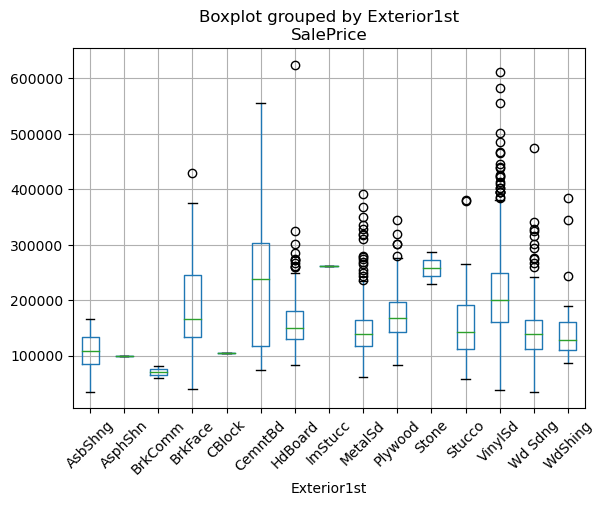

In [51]:
print(train['Exterior1st'].value_counts())
train.boxplot('SalePrice', by='Exterior1st', rot=45)

In [52]:
train.loc[(train['Exterior1st'].isin(['AsbShng', 'AsphShn', 'BrkComm', 'CBlock'])), 'Exterior1st'] = 'Lvl_1'
train.loc[(train['Exterior1st'].isin(['HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'Wd Sdng', 'WdShing'])), 'Exterior1st'] = 'Lvl_2'
train.loc[(train['Exterior1st'].isin(['VinylSd', 'BrkFace', 'CemntBd', 'Stone', 'ImStucc'])), 'Exterior1st'] = 'Lvl_3'

Lvl_2    804
Lvl_3    628
Lvl_1     24
Name: Exterior1st, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Exterior1st'>

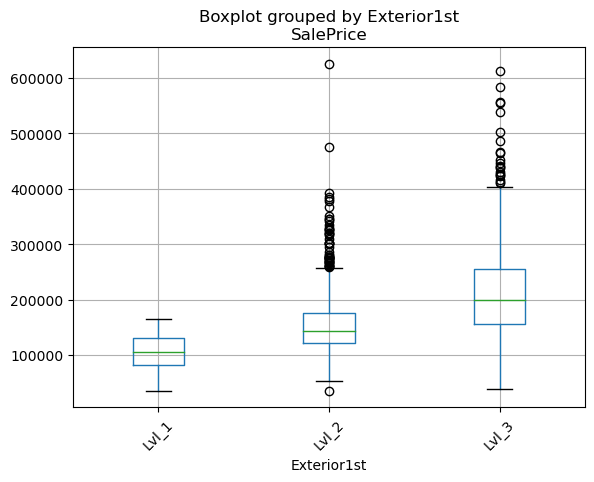

In [53]:
print(train['Exterior1st'].value_counts())
train.boxplot('SalePrice', by='Exterior1st', rot=45)

VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
BrkFace     25
Stucco      25
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Exterior2nd'>

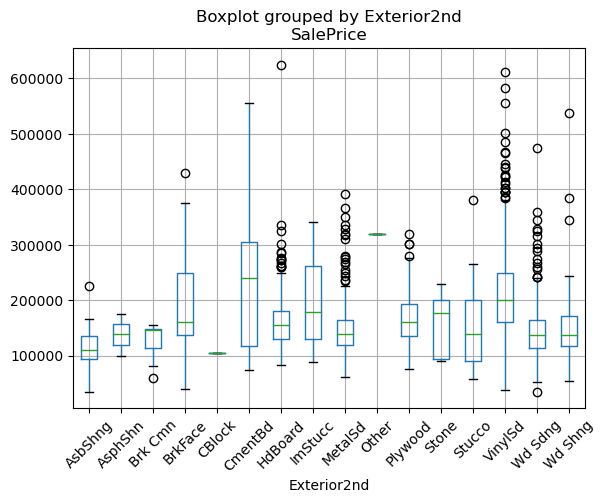

In [54]:
print(train['Exterior2nd'].value_counts())
train.boxplot('SalePrice', by='Exterior2nd', rot=45)

In [55]:
train.drop('Exterior2nd', axis=1, inplace=True)

None       863
BrkFace    444
Stone      126
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MasVnrType'>

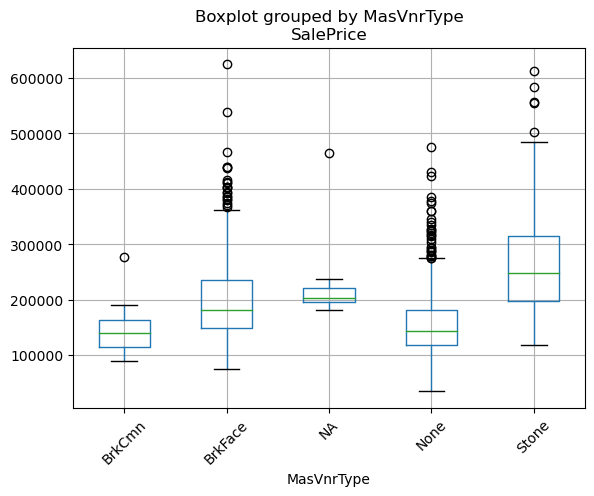

In [56]:
print(train['MasVnrType'].value_counts())
train.boxplot('SalePrice', by='MasVnrType', rot=45)

In [57]:
train.loc[(train['MasVnrType'].isin(['BrkFace', 'NA'])), 'MasVnrType'] = 'Lvl_2'
train.loc[(train['MasVnrType'].isin(['BrkCmn', 'None'])), 'MasVnrType'] = 'Lvl_1'
train.loc[(train['MasVnrType'].isin(['Stone'])), 'MasVnrType'] = 'Lvl_3'

Lvl_1    878
Lvl_2    452
Lvl_3    126
Name: MasVnrType, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MasVnrType'>

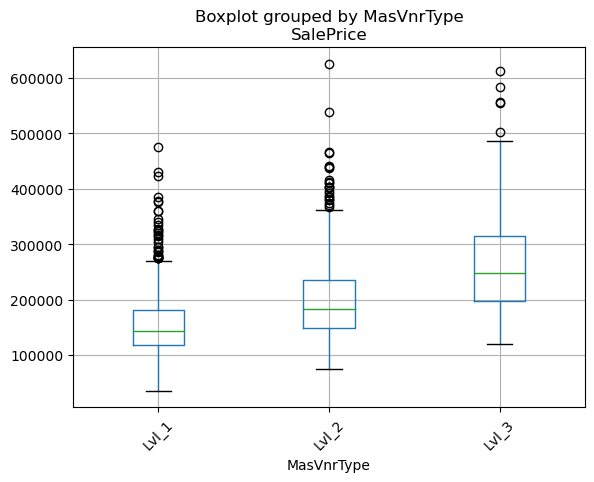

In [58]:
print(train['MasVnrType'].value_counts())
train.boxplot('SalePrice', by='MasVnrType', rot=45)

0.0      868
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
261.0      1
748.0      1
259.0      1
209.0      1
119.0      1
Name: MasVnrArea, Length: 324, dtype: int64


<AxesSubplot: xlabel='MasVnrArea', ylabel='SalePrice'>

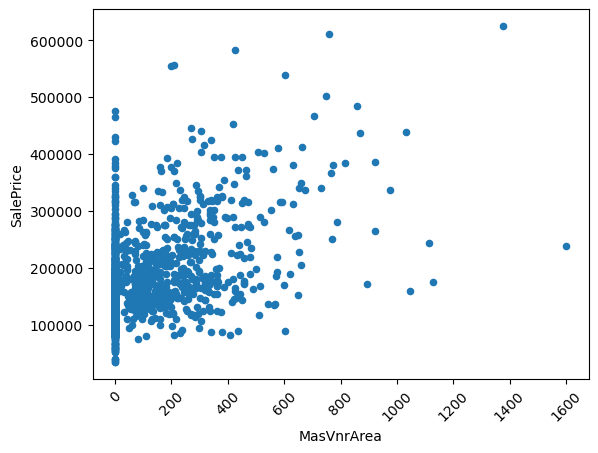

In [59]:
print(train['MasVnrArea'].value_counts())
train.plot.scatter('MasVnrArea', 'SalePrice', rot=45)

In [60]:
train.loc[(train['MasVnrArea'] == 0), 'MasVnrArea'] = 0
train.loc[(train['MasVnrArea'] > 0), 'MasVnrArea'] = 1

0.0    868
1.0    588
Name: MasVnrArea, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MasVnrArea'>

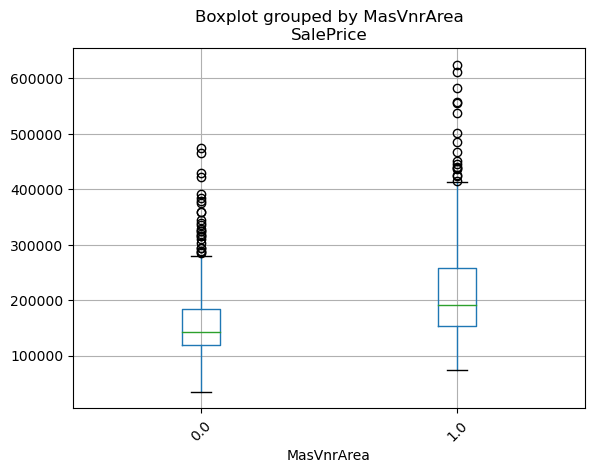

In [61]:
print(train['MasVnrArea'].value_counts())
train.boxplot('SalePrice', by='MasVnrArea', rot=45)

In [62]:
train.drop('MasVnrArea', axis=1, inplace=True)

TA    906
Gd    487
Ex     49
Fa     14
Name: ExterQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='ExterQual'>

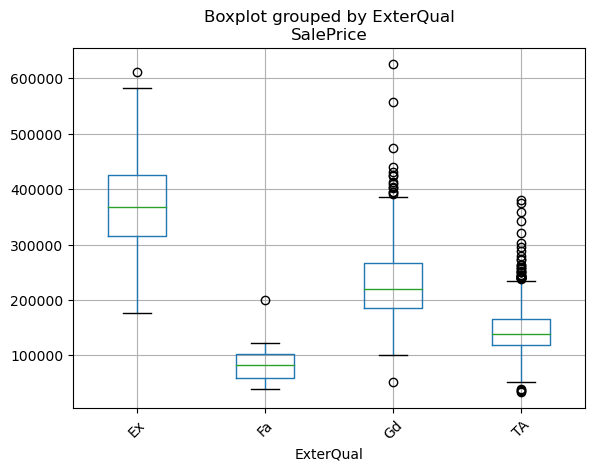

In [63]:
print(train['ExterQual'].value_counts())
train.boxplot('SalePrice', by='ExterQual', rot=45)

In [64]:
train.loc[(train['ExterQual'].isin(['Fa', 'TA'])), 'ExterQual'] = 0
train.loc[(train['ExterQual'].isin(['Ex', 'Gd'])), 'ExterQual'] = 1

0    920
1    536
Name: ExterQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='ExterQual'>

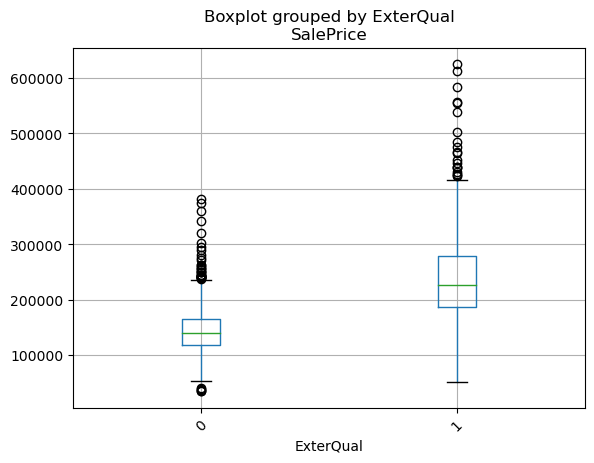

In [65]:
print(train['ExterQual'].value_counts())
train.boxplot('SalePrice', by='ExterQual', rot=45)

TA    1278
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='ExterCond'>

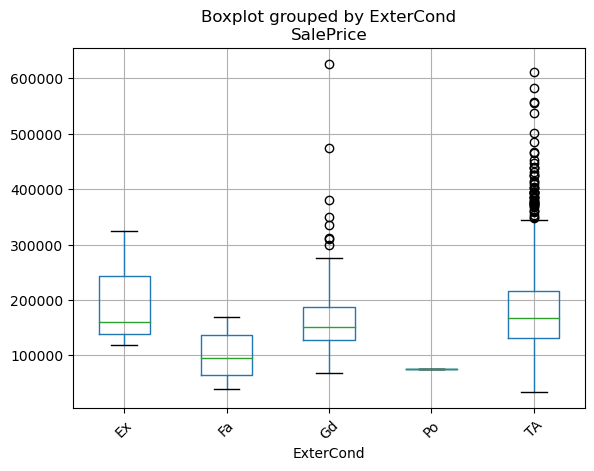

In [66]:
print(train['ExterCond'].value_counts())
train.boxplot('SalePrice', by='ExterCond', rot=45)

In [67]:
train.loc[(train['ExterCond'].isin(['Fa', 'Po'])), 'ExterCond'] = 0
train.loc[(train['ExterCond'].isin(['Ex', 'Gd', 'TA'])), 'ExterCond'] = 1

1    1427
0      29
Name: ExterCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='ExterCond'>

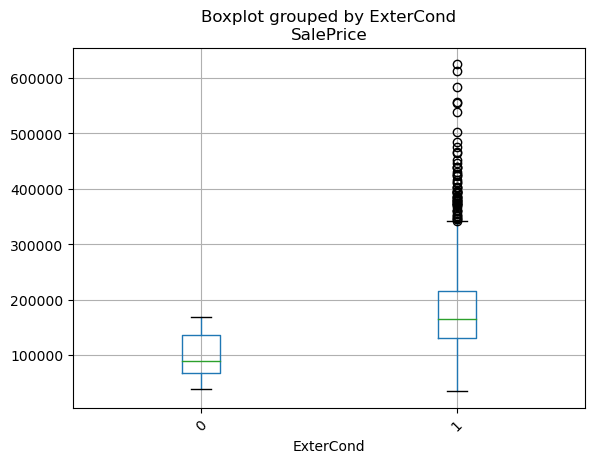

In [68]:
print(train['ExterCond'].value_counts())
train.boxplot('SalePrice', by='ExterCond', rot=45)

PConc     643
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Foundation'>

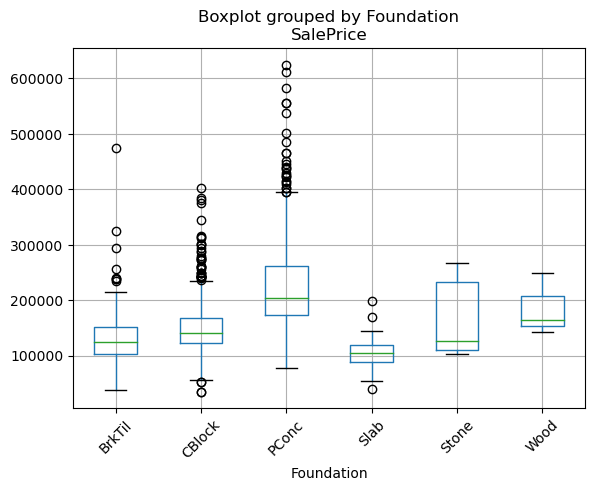

In [69]:
print(train['Foundation'].value_counts())
train.boxplot('SalePrice', by='Foundation', rot=45)

In [70]:
train.loc[(~train['Foundation'].isin(['PConc'])), 'Foundation'] = 0
train.loc[(train['Foundation'].isin(['PConc'])), 'Foundation'] = 1

0    813
1    643
Name: Foundation, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Foundation'>

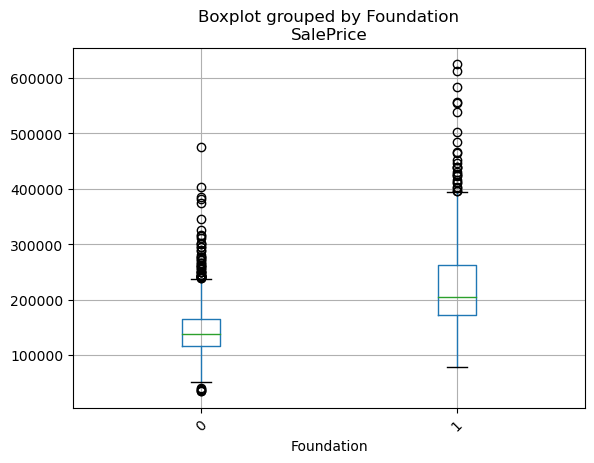

In [71]:
print(train['Foundation'].value_counts())
train.boxplot('SalePrice', by='Foundation', rot=45)

TA    649
Gd    618
Ex    117
NA     37
Fa     35
Name: BsmtQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtQual'>

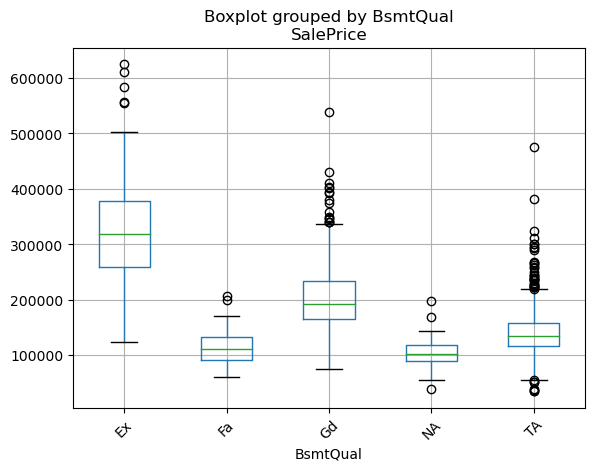

In [72]:
print(train['BsmtQual'].value_counts())
train.boxplot('SalePrice', by='BsmtQual', rot=45)

In [73]:
train.loc[(train['BsmtQual'].isin(['Gd', 'Ex'])), 'BsmtQual'] = 1
train.loc[(train['BsmtQual'].isin(['Fa', 'NA', 'TA'])), 'BsmtQual'] = 0

1    735
0    721
Name: BsmtQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtQual'>

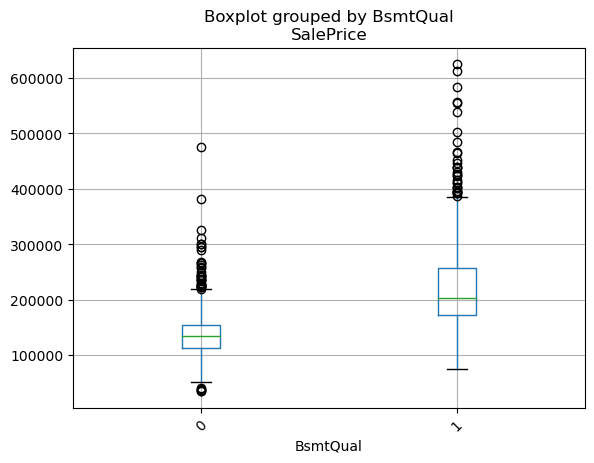

In [74]:
print(train['BsmtQual'].value_counts())
train.boxplot('SalePrice', by='BsmtQual', rot=45)

TA    1307
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtCond'>

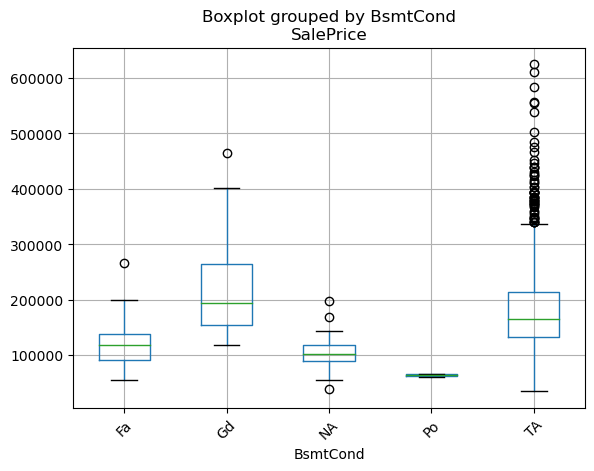

In [75]:
print(train['BsmtCond'].value_counts())
train.boxplot('SalePrice', by='BsmtCond', rot=45)

In [76]:
train.loc[(train['BsmtCond'].isin(['Gd', 'TA'])), 'BsmtCond'] = 1
train.loc[(train['BsmtCond'].isin(['Fa', 'NA', 'Po'])), 'BsmtCond'] = 0

1    1372
0      84
Name: BsmtCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtCond'>

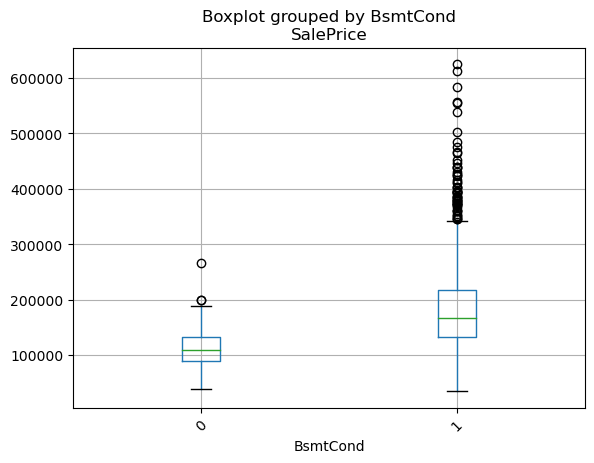

In [77]:
print(train['BsmtCond'].value_counts())
train.boxplot('SalePrice', by='BsmtCond', rot=45)

No    953
Av    220
Gd    131
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtExposure'>

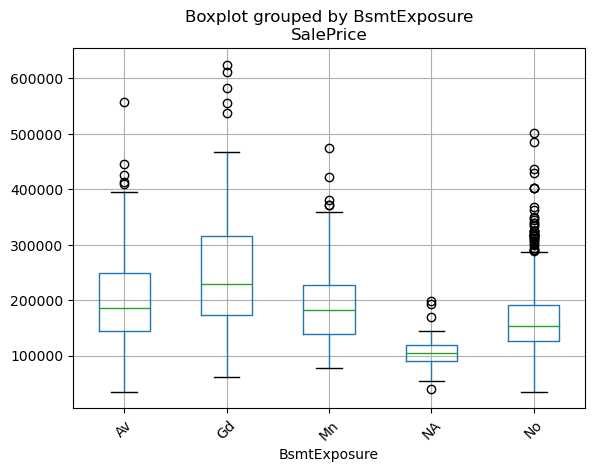

In [78]:
print(train['BsmtExposure'].value_counts())
train.boxplot('SalePrice', by='BsmtExposure', rot=45)

In [79]:
train.loc[(train['BsmtExposure'].isin(['Gd', 'Av', 'Mn'])), 'BsmtExposure'] = 1
train.loc[(train['BsmtExposure'].isin(['NA', 'No'])), 'BsmtExposure'] = 0

0    991
1    465
Name: BsmtExposure, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtExposure'>

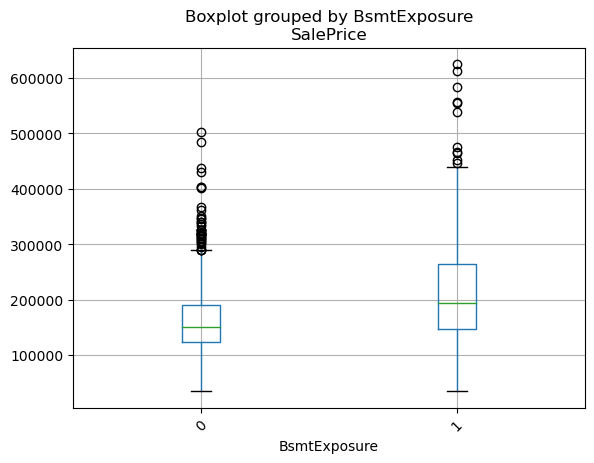

In [80]:
print(train['BsmtExposure'].value_counts())
train.boxplot('SalePrice', by='BsmtExposure', rot=45)

Unf    430
GLQ    414
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtFinType1'>

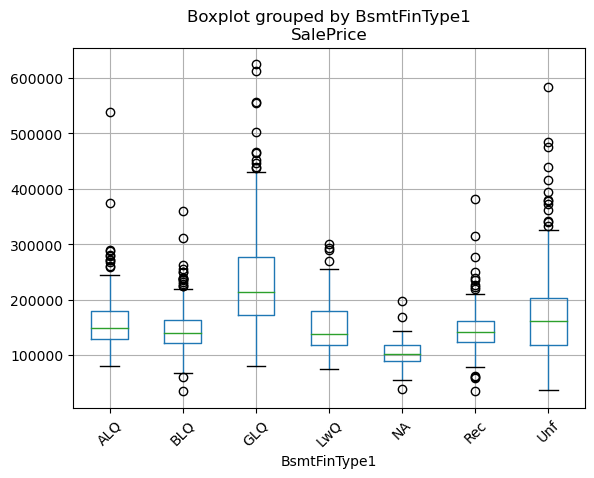

In [81]:
print(train['BsmtFinType1'].value_counts())
train.boxplot('SalePrice', by='BsmtFinType1', rot=45)

In [82]:
train.drop('BsmtFinType1', axis=1, inplace=True)

0       467
24       12
16        9
662       5
616       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 633, dtype: int64


<AxesSubplot: xlabel='BsmtFinSF1', ylabel='SalePrice'>

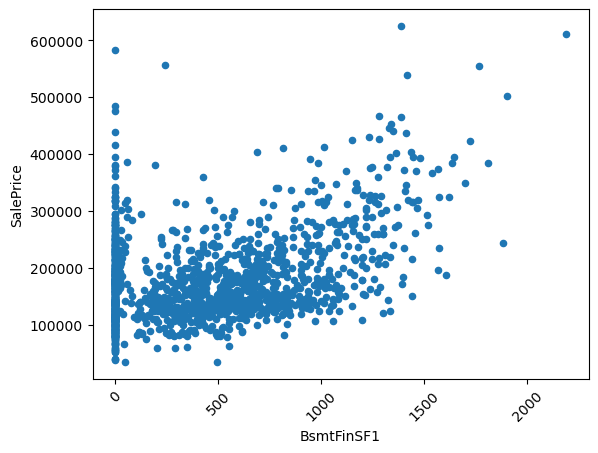

In [83]:
print(train['BsmtFinSF1'].value_counts())
train.plot.scatter('BsmtFinSF1', 'SalePrice', rot=45)

In [84]:
train.drop(['BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 717, dtype: int64


<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

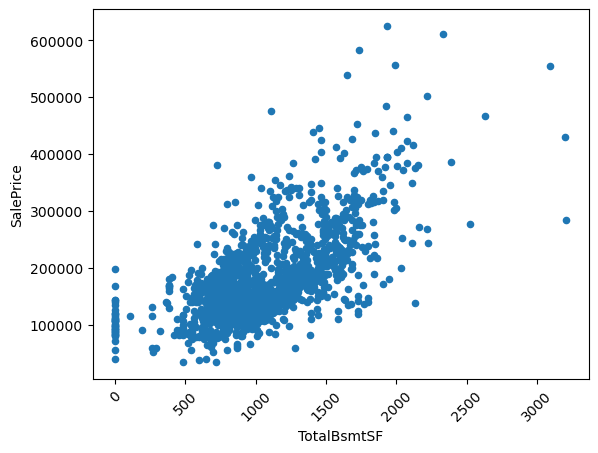

In [85]:
print(train['TotalBsmtSF'].value_counts())
train.plot.scatter('TotalBsmtSF', 'SalePrice', rot=45)

GasA     1424
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Heating'>

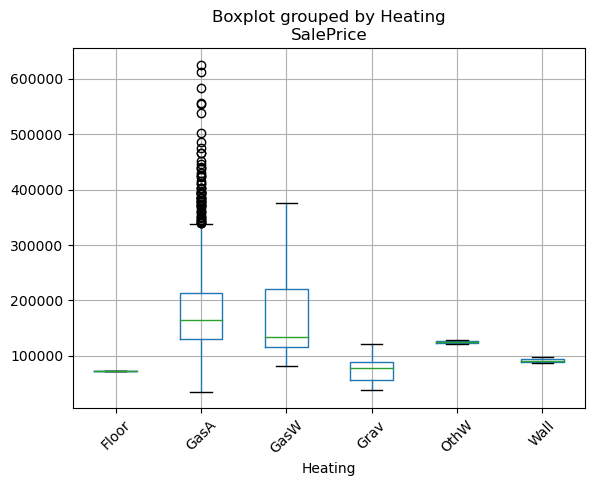

In [86]:
print(train['Heating'].value_counts())
train.boxplot('SalePrice', by='Heating', rot=45)

In [87]:
train.drop('Heating', axis=1, inplace=True)

Ex    737
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='HeatingQC'>

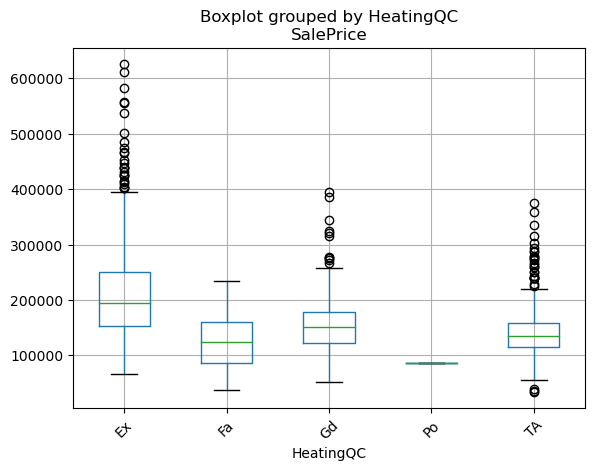

In [88]:
print(train['HeatingQC'].value_counts())
train.boxplot('SalePrice', by='HeatingQC', rot=45)

In [89]:
train.loc[(train['HeatingQC'].isin(['Ex'])), 'HeatingQC'] = 1
train.loc[(train['HeatingQC'].isin(['Fa', 'Gd', 'Po', 'TA'])), 'HeatingQC'] = 0

1    737
0    719
Name: HeatingQC, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='HeatingQC'>

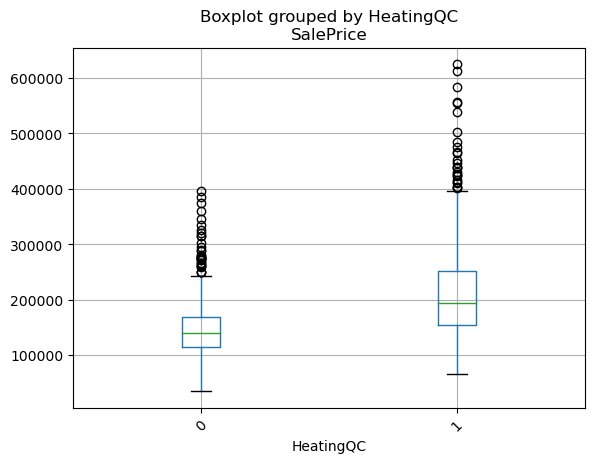

In [90]:
print(train['HeatingQC'].value_counts())
train.boxplot('SalePrice', by='HeatingQC', rot=45)

Y    1361
N      95
Name: CentralAir, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='CentralAir'>

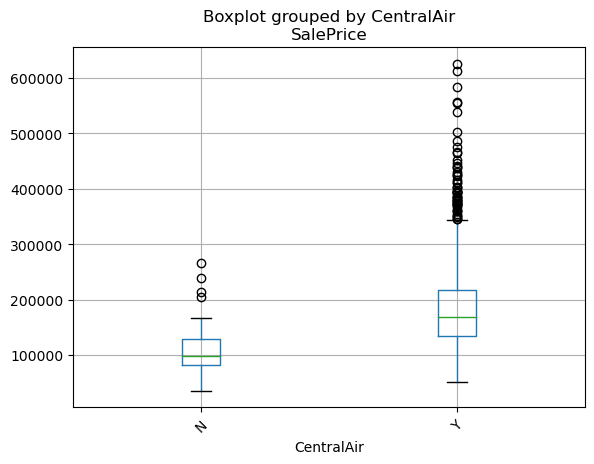

In [91]:
print(train['CentralAir'].value_counts())
train.boxplot('SalePrice', by='CentralAir', rot=45)

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Electrical'>

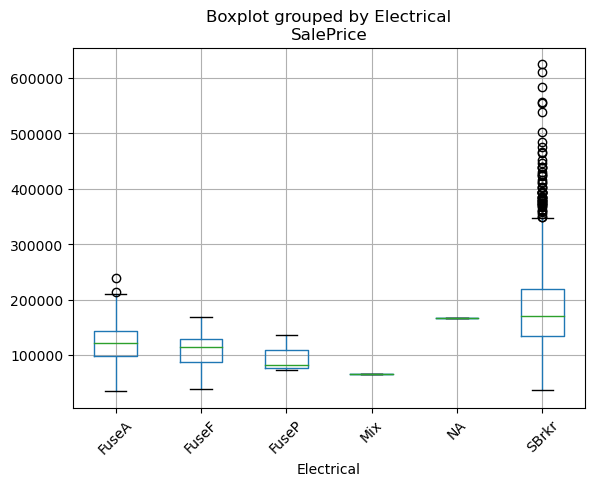

In [92]:
print(train['Electrical'].value_counts())
train.boxplot('SalePrice', by='Electrical', rot=45)

In [93]:
train.loc[(~train['Electrical'].isin(['SBrkr', 'NA'])), 'Electrical'] = 0
train.loc[(train['Electrical'].isin(['SBrkr', 'NA'])), 'Electrical'] = 1

1    1331
0     125
Name: Electrical, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Electrical'>

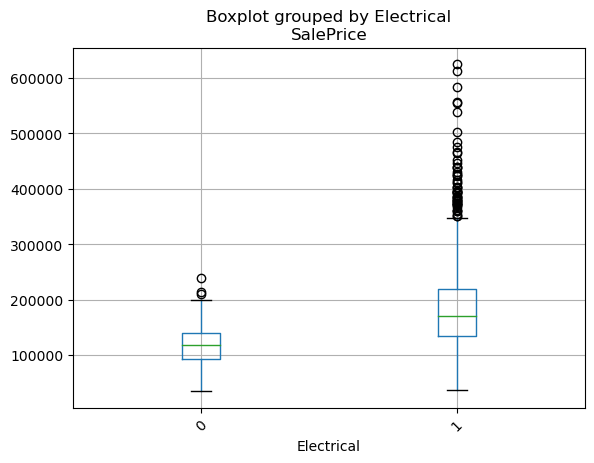

In [94]:
print(train['Electrical'].value_counts())
train.boxplot('SalePrice', by='Electrical', rot=45)

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
1244     1
1256     1
Name: 1stFlrSF, Length: 749, dtype: int64


<AxesSubplot: xlabel='1stFlrSF', ylabel='SalePrice'>

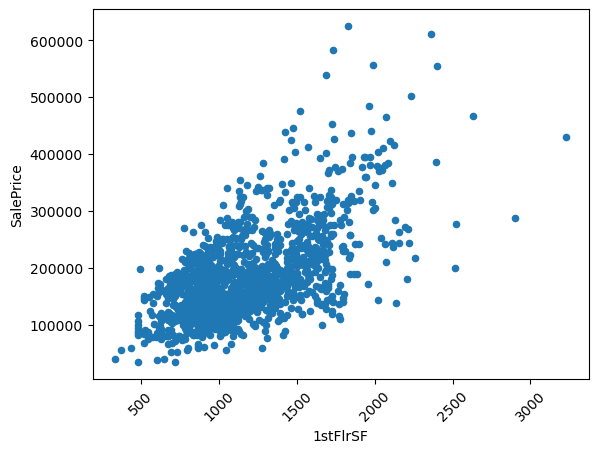

In [95]:
print(train['1stFlrSF'].value_counts())
train.plot.scatter('1stFlrSF', 'SalePrice', rot=45)

0       829
728      10
504       9
546       8
672       8
       ... 
1067      1
1000      1
687       1
910       1
1152      1
Name: 2ndFlrSF, Length: 413, dtype: int64


<AxesSubplot: xlabel='2ndFlrSF', ylabel='SalePrice'>

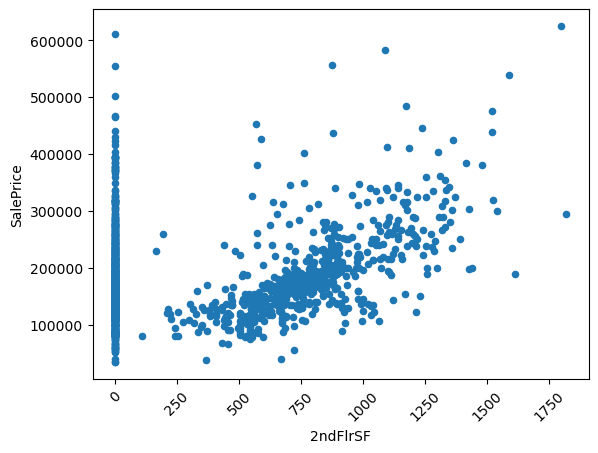

In [96]:
print(train['2ndFlrSF'].value_counts())
train.plot.scatter('2ndFlrSF', 'SalePrice', rot=45)

In [97]:
#train['has_2nd_floor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

In [98]:
#print(train['has_2nd_floor'].value_counts())
#train.boxplot('SalePrice', by='has_2nd_floor', rot=45)

0      1430
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64


<AxesSubplot: xlabel='LowQualFinSF', ylabel='SalePrice'>

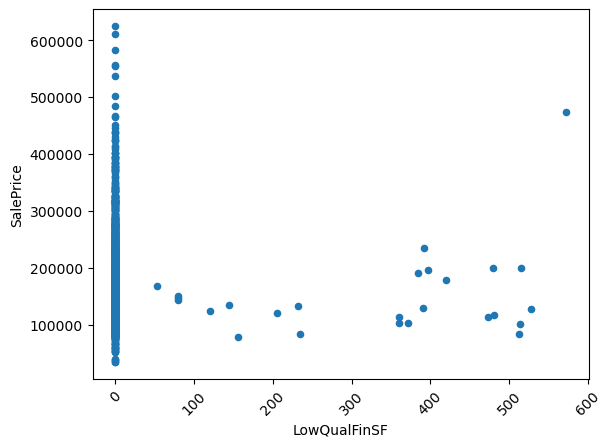

In [99]:
print(train['LowQualFinSF'].value_counts())
train.plot.scatter('LowQualFinSF', 'SalePrice', rot=45)

In [100]:
train.drop('LowQualFinSF', axis=1, inplace=True)

864     22
1040    14
894     11
848     10
1456    10
        ..
1041     1
2119     1
2344     1
1244     1
1256     1
Name: GrLivArea, Length: 857, dtype: int64


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

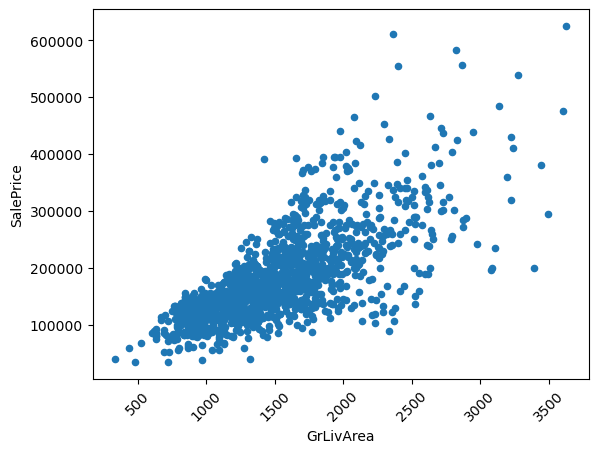

In [101]:
print(train['GrLivArea'].value_counts())
train.plot.scatter('GrLivArea', 'SalePrice', rot=45)

In [102]:
train[['GrLivArea', '1stFlrSF']].corr()

GrLivArea  1stFlrSF
GrLivArea    1.00000   0.52292
1stFlrSF     0.52292   1.00000

0    855
1    586
2     14
3      1
Name: BsmtFullBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtFullBath'>

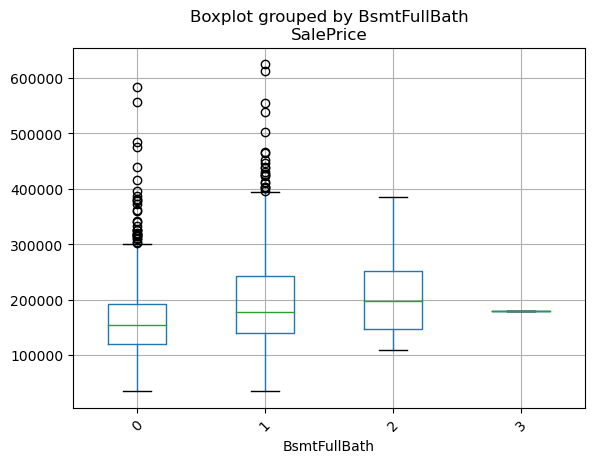

In [103]:
print(train['BsmtFullBath'].value_counts())
train.boxplot('SalePrice', by='BsmtFullBath', rot=45)

In [104]:
train.loc[(train['BsmtFullBath'] > 0), 'BsmtFullBath'] = 1

0    855
1    601
Name: BsmtFullBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtFullBath'>

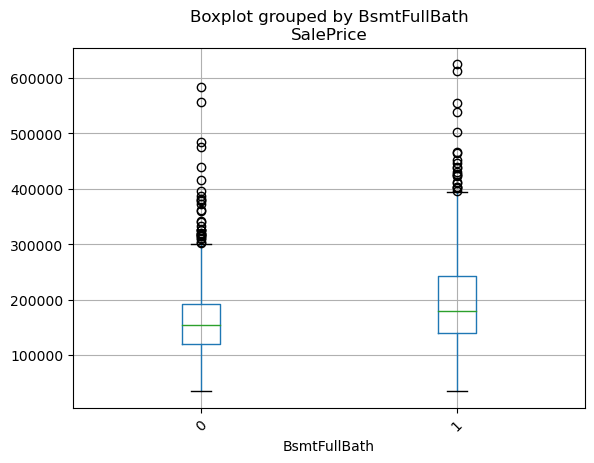

In [105]:
print(train['BsmtFullBath'].value_counts())
train.boxplot('SalePrice', by='BsmtFullBath', rot=45)

0    1375
1      79
2       2
Name: BsmtHalfBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BsmtHalfBath'>

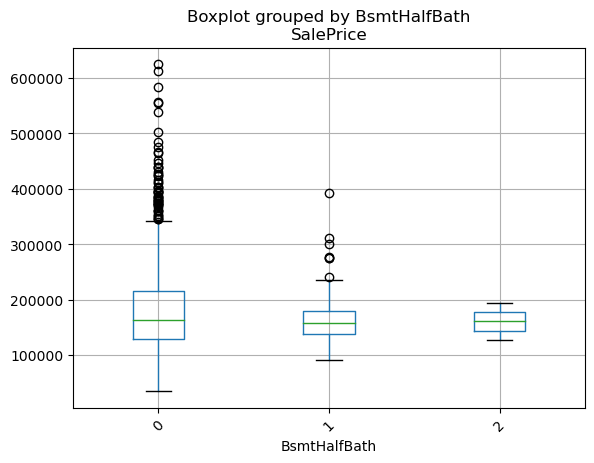

In [106]:
print(train['BsmtHalfBath'].value_counts())
train.boxplot('SalePrice', by='BsmtHalfBath', rot=45)

In [107]:
train.drop('BsmtHalfBath', axis=1, inplace=True)

2    767
1    650
3     30
0      9
Name: FullBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='FullBath'>

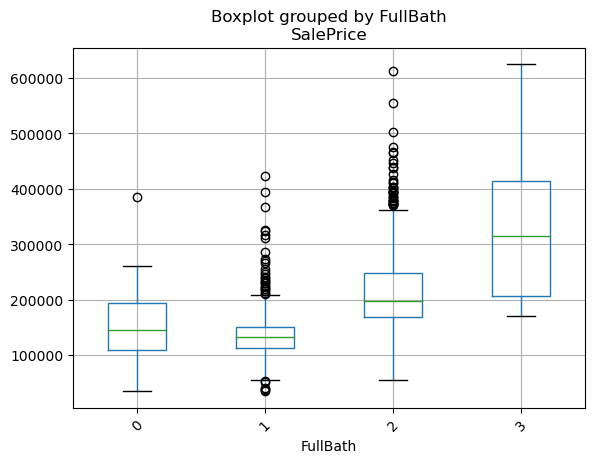

In [108]:
print(train['FullBath'].value_counts())
train.boxplot('SalePrice', by='FullBath', rot=45)

In [109]:
train.loc[(train['FullBath'] <= 1), 'FullBath'] = 1
train.loc[(train['FullBath'] > 1), 'FullBath'] = 2

2    797
1    659
Name: FullBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='FullBath'>

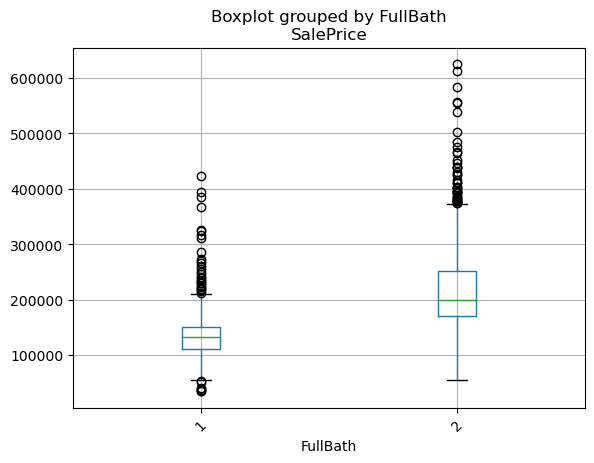

In [110]:
print(train['FullBath'].value_counts())
train.boxplot('SalePrice', by='FullBath', rot=45)

0    913
1    531
2     12
Name: HalfBath, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='HalfBath'>

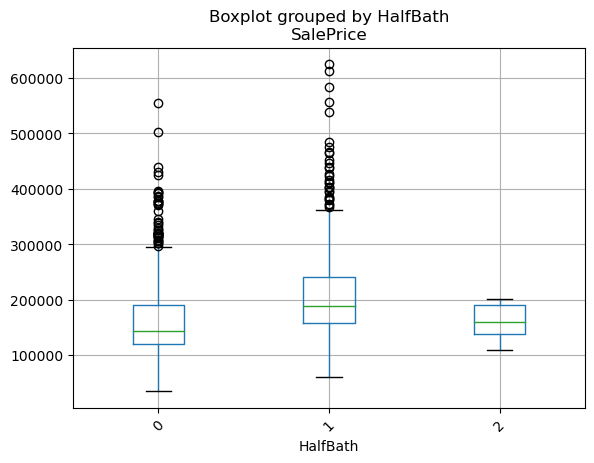

In [111]:
print(train['HalfBath'].value_counts())
train.boxplot('SalePrice', by='HalfBath', rot=45)

In [112]:
train.drop('HalfBath', axis=1, inplace=True)

3    802
2    358
4    211
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='BedroomAbvGr'>

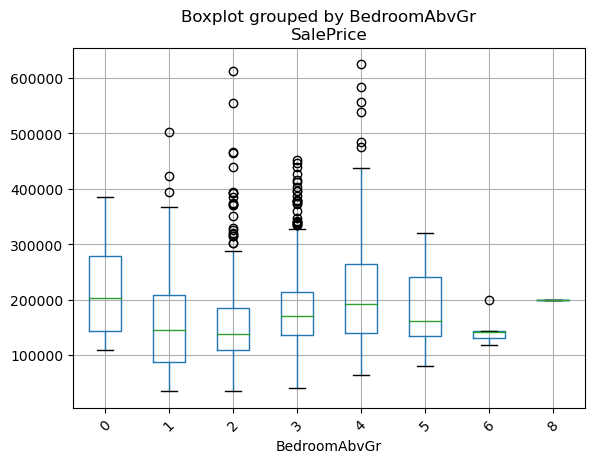

In [113]:
print(train['BedroomAbvGr'].value_counts())
train.boxplot('SalePrice', by='BedroomAbvGr', rot=45)

In [114]:
train.drop('BedroomAbvGr', axis=1, inplace=True)

1    1388
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='KitchenAbvGr'>

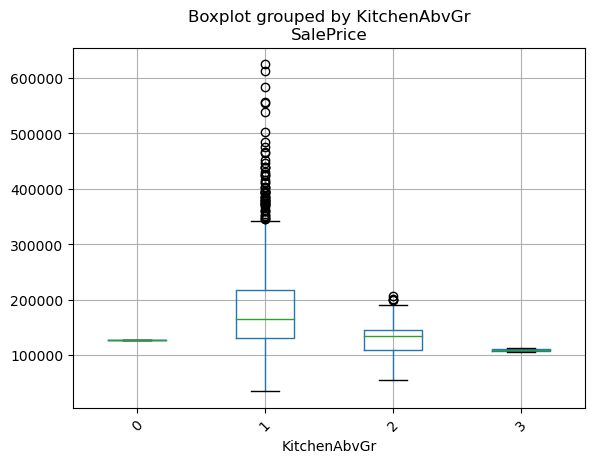

In [115]:
print(train['KitchenAbvGr'].value_counts())
train.boxplot('SalePrice', by='KitchenAbvGr', rot=45)

In [116]:
train.drop('KitchenAbvGr', axis=1, inplace=True)

TA    735
Gd    586
Ex     96
Fa     39
Name: KitchenQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='KitchenQual'>

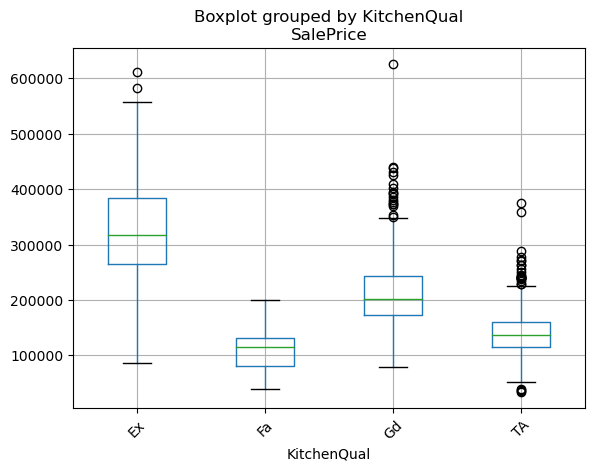

In [117]:
print(train['KitchenQual'].value_counts())
train.boxplot('SalePrice', by='KitchenQual', rot=45)

6     402
7     329
5     275
8     187
4      97
9      75
10     45
11     17
3      17
12     10
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='TotRmsAbvGrd'>

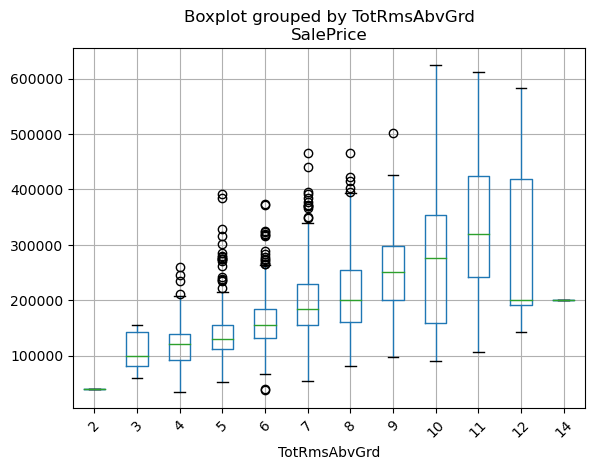

In [118]:
print(train['TotRmsAbvGrd'].value_counts())
train.boxplot('SalePrice', by='TotRmsAbvGrd', rot=45)

Typ     1356
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Functional'>

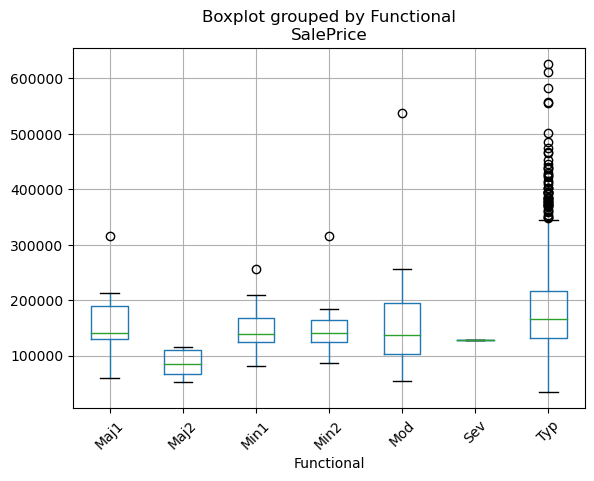

In [119]:
print(train['Functional'].value_counts())
train.boxplot('SalePrice', by='Functional', rot=45)

In [120]:
train.drop('Functional', axis=1, inplace=True)

0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Fireplaces'>

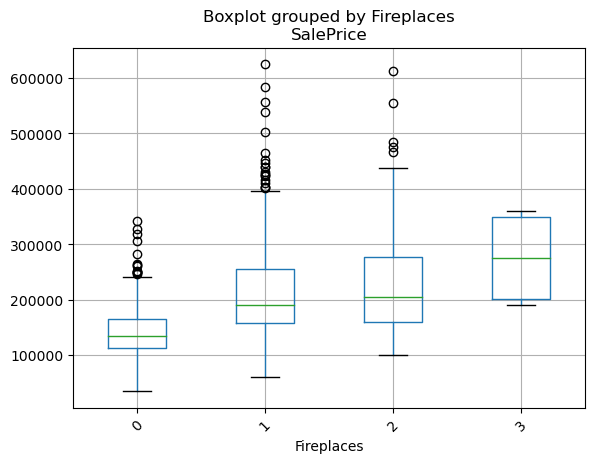

In [121]:
print(train['Fireplaces'].value_counts())
train.boxplot('SalePrice', by='Fireplaces', rot=45)

In [122]:
train.loc[(train['Fireplaces'] >= 1), 'Fireplaces'] = 1

1    766
0    690
Name: Fireplaces, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Fireplaces'>

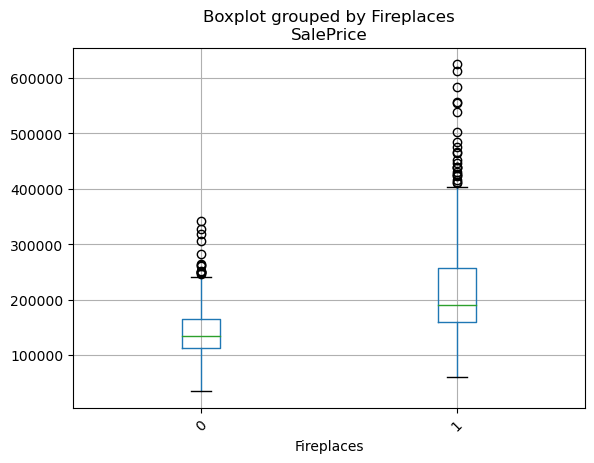

In [123]:
print(train['Fireplaces'].value_counts())
train.boxplot('SalePrice', by='Fireplaces', rot=45)

NA    690
Gd    378
TA    312
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='FireplaceQu'>

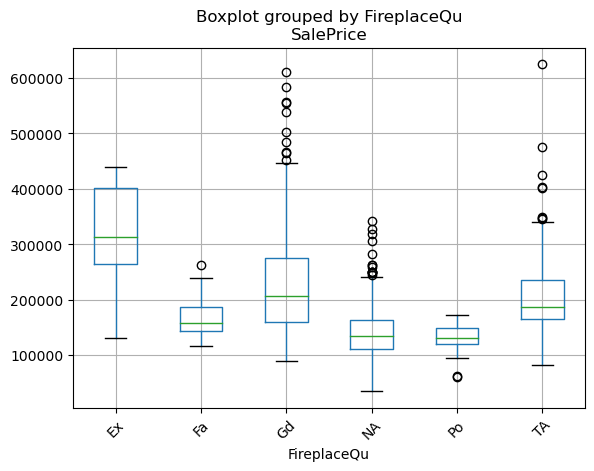

In [124]:
print(train['FireplaceQu'].value_counts())
train.boxplot('SalePrice', by='FireplaceQu', rot=45)

In [125]:
train.loc[(train['FireplaceQu'].isin(['Gd', 'TA'])), 'FireplaceQu'] = 'Gd'
train.loc[(train['FireplaceQu'].isin(['Fa', 'NA', 'Po'])), 'FireplaceQu'] = 'Low'

Low    743
Gd     690
Ex      23
Name: FireplaceQu, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='FireplaceQu'>

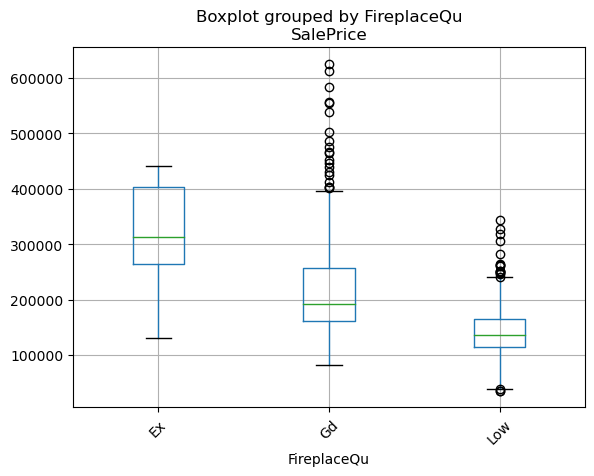

In [126]:
print(train['FireplaceQu'].value_counts())
train.boxplot('SalePrice', by='FireplaceQu', rot=45)

Attchd     867
Detchd     387
BuiltIn     87
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageType'>

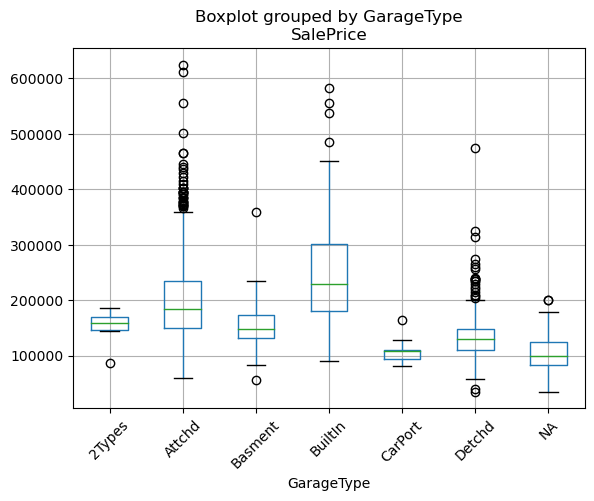

In [127]:
print(train['GarageType'].value_counts())
train.boxplot('SalePrice', by='GarageType', rot=45)

In [128]:
train.drop('GarageType', axis=1, inplace=True)

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageYrBlt'>

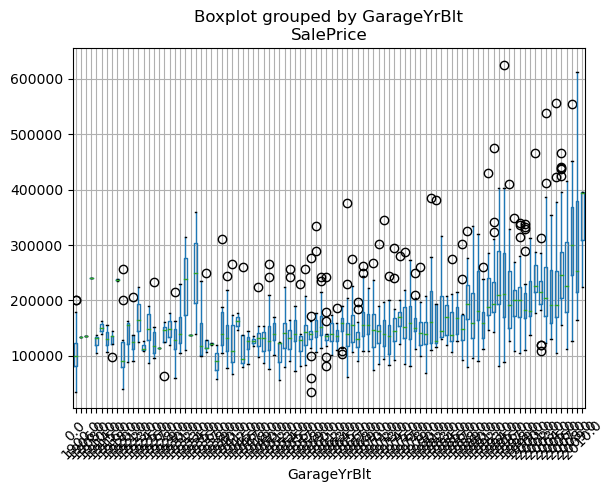

In [129]:
print(train['GarageYrBlt'].value_counts())
train.boxplot('SalePrice', by='GarageYrBlt', rot=45)

In [130]:
train.drop('GarageYrBlt', axis=1, inplace=True)

Unf    605
RFn    422
Fin    348
NA      81
Name: GarageFinish, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageFinish'>

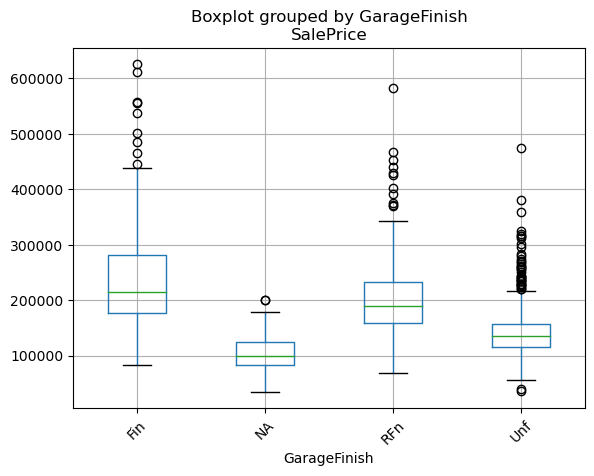

In [131]:
print(train['GarageFinish'].value_counts())
train.boxplot('SalePrice', by='GarageFinish', rot=45)

2    823
1    369
3    178
0     81
4      5
Name: GarageCars, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageCars'>

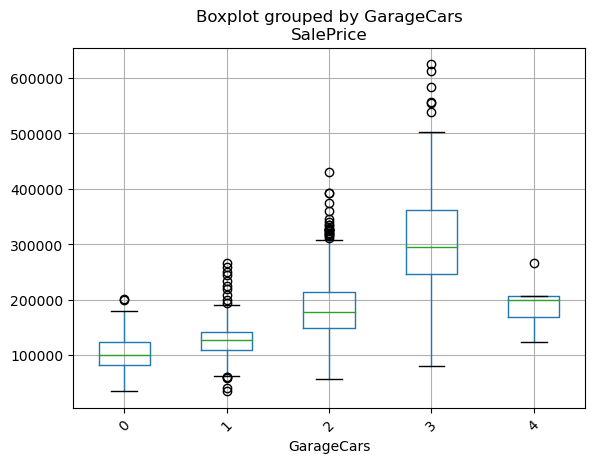

In [132]:
print(train['GarageCars'].value_counts())
train.boxplot('SalePrice', by='GarageCars', rot=45)

0      81
440    49
576    47
240    38
484    34
       ..
435     1
320     1
594     1
831     1
192     1
Name: GarageArea, Length: 438, dtype: int64


<AxesSubplot: xlabel='GarageArea', ylabel='SalePrice'>

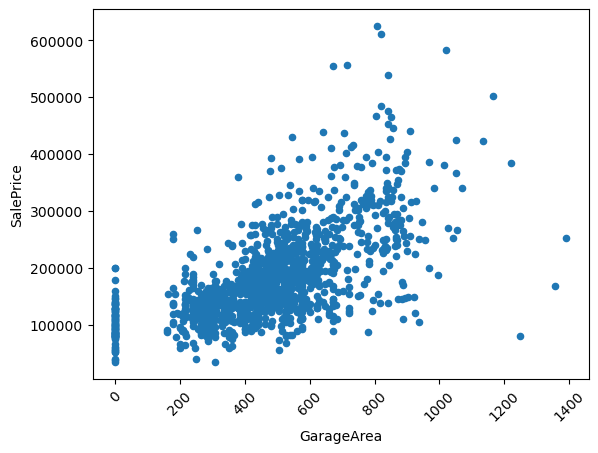

In [133]:
print(train['GarageArea'].value_counts())
train.plot.scatter('GarageArea', 'SalePrice', rot=45)

TA    1307
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageQual'>

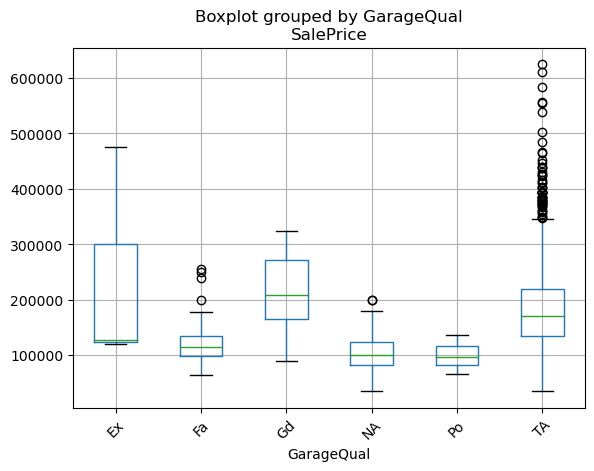

In [134]:
print(train['GarageQual'].value_counts())
train.boxplot('SalePrice', by='GarageQual', rot=45)

In [135]:
train.drop('GarageQual', axis=1, inplace=True)

TA    1322
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='GarageCond'>

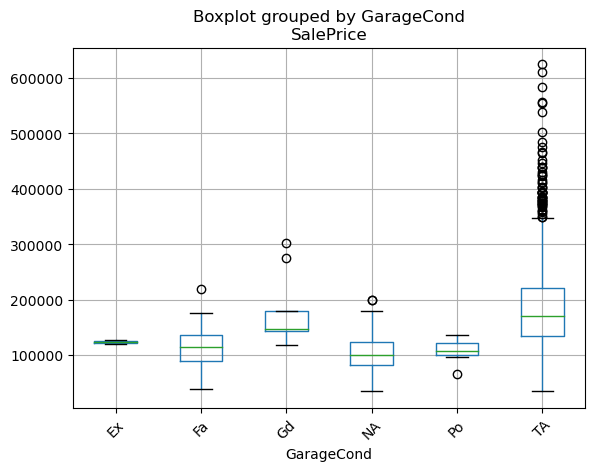

In [136]:
print(train['GarageCond'].value_counts())
train.boxplot('SalePrice', by='GarageCond', rot=45)

In [137]:
train.drop('GarageCond', axis=1, inplace=True)

Y    1336
N      90
P      30
Name: PavedDrive, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='PavedDrive'>

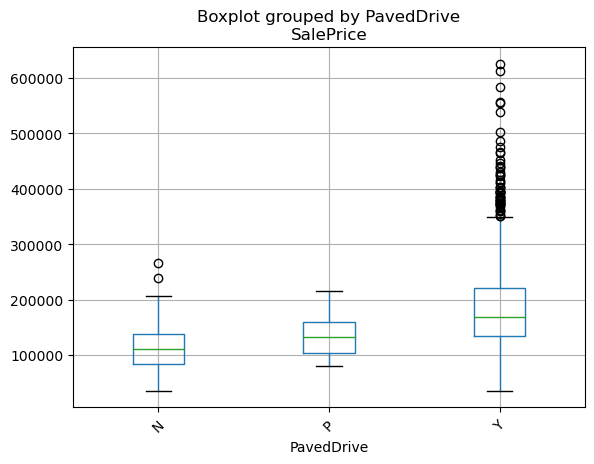

In [138]:
print(train['PavedDrive'].value_counts())
train.boxplot('SalePrice', by='PavedDrive', rot=45)

0      761
192     38
100     36
144     33
120     31
      ... 
326      1
382      1
179      1
103      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64


<AxesSubplot: xlabel='WoodDeckSF', ylabel='SalePrice'>

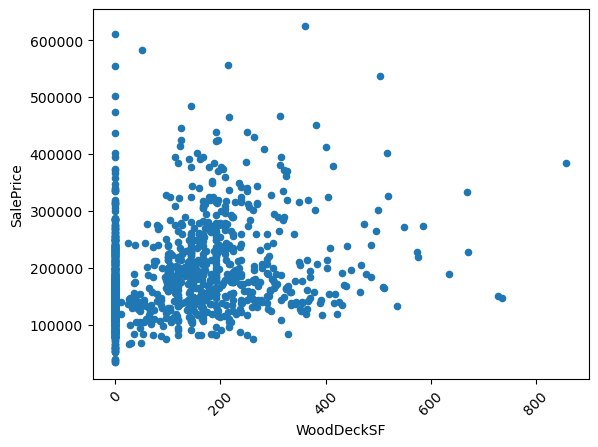

In [139]:
print(train['WoodDeckSF'].value_counts())
train.plot.scatter('WoodDeckSF', 'SalePrice', rot=45)

In [140]:
#train['has_wood_deck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [141]:
#print(train['has_wood_deck'].value_counts())
#train.boxplot('SalePrice', by='has_wood_deck', rot=45)

0      656
36      29
48      22
20      21
40      19
      ... 
133      1
85       1
187      1
123      1
236      1
Name: OpenPorchSF, Length: 200, dtype: int64


<AxesSubplot: xlabel='OpenPorchSF', ylabel='SalePrice'>

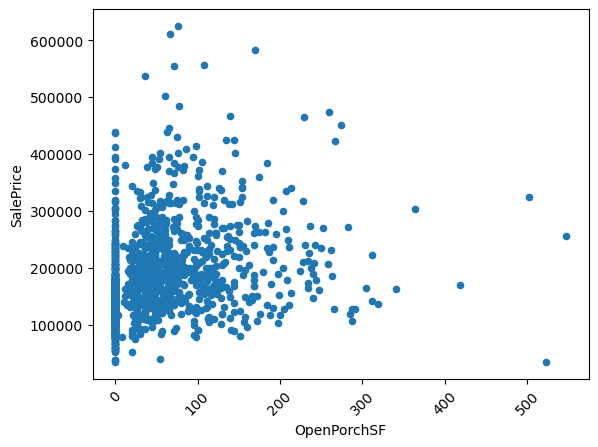

In [142]:
print(train['OpenPorchSF'].value_counts())
train.plot.scatter('OpenPorchSF', 'SalePrice', rot=45)

In [143]:
#train['has_open_porch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

In [144]:
#print(train['has_open_porch'].value_counts())
#train.boxplot('SalePrice', by='has_open_porch', rot=45)

0      1248
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64


<AxesSubplot: xlabel='EnclosedPorch', ylabel='SalePrice'>

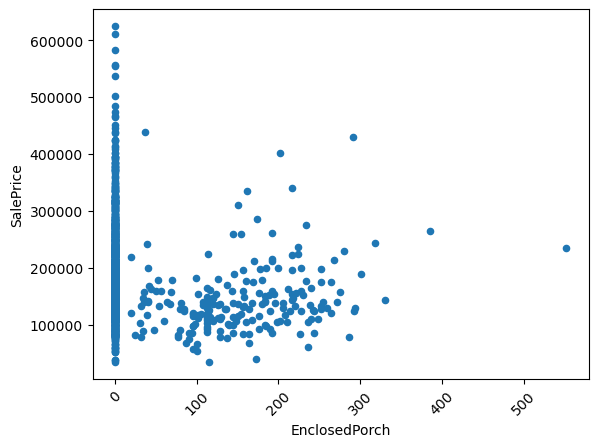

In [145]:
print(train['EnclosedPorch'].value_counts())
train.plot.scatter('EnclosedPorch', 'SalePrice', rot=45)

In [146]:
train.drop('EnclosedPorch', axis=1, inplace=True)

0      1432
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


<AxesSubplot: xlabel='3SsnPorch', ylabel='SalePrice'>

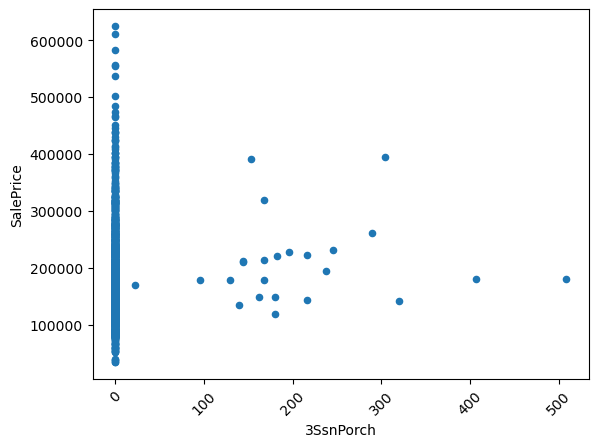

In [147]:
print(train['3SsnPorch'].value_counts())
train.plot.scatter('3SsnPorch', 'SalePrice', rot=45)

In [148]:
train.drop('3SsnPorch', axis=1, inplace=True)

0      1340
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64


<AxesSubplot: xlabel='ScreenPorch', ylabel='SalePrice'>

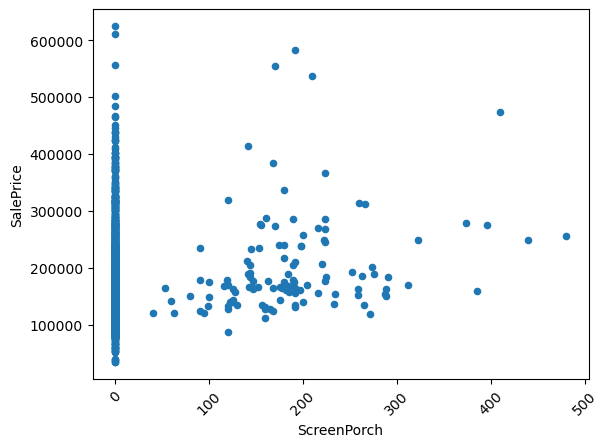

In [149]:
print(train['ScreenPorch'].value_counts())
train.plot.scatter('ScreenPorch', 'SalePrice', rot=45)

In [150]:
train.drop('ScreenPorch', axis=1, inplace=True)

0      1451
512       1
648       1
576       1
519       1
738       1
Name: PoolArea, dtype: int64


<AxesSubplot: xlabel='PoolArea', ylabel='SalePrice'>

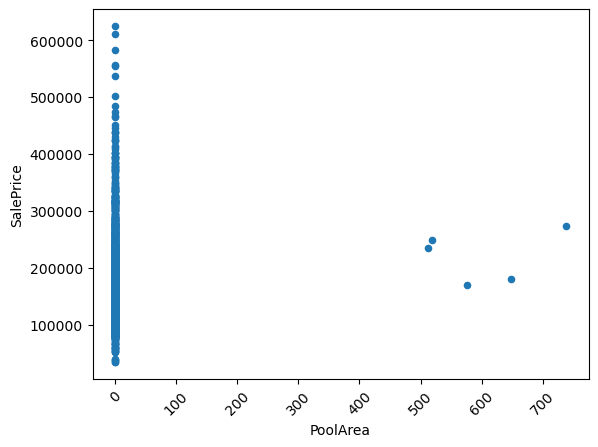

In [151]:
print(train['PoolArea'].value_counts())
train.plot.scatter('PoolArea', 'SalePrice', rot=45)

In [152]:
train.drop('PoolArea', axis=1, inplace=True)

NA    1451
Fa       2
Gd       2
Ex       1
Name: PoolQC, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='PoolQC'>

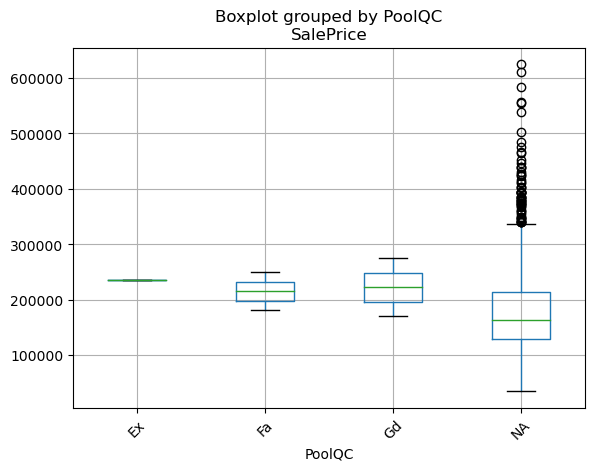

In [153]:
print(train['PoolQC'].value_counts())
train.boxplot('SalePrice', by='PoolQC', rot=45)

In [154]:
train.drop('PoolQC', axis=1, inplace=True)

NA       1176
MnPrv     156
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Fence'>

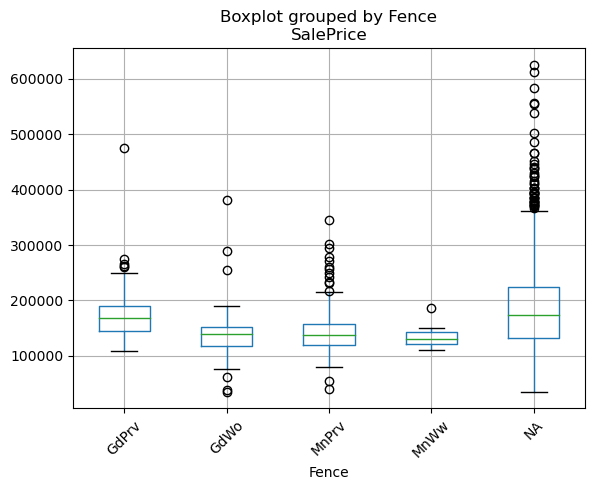

In [155]:
print(train['Fence'].value_counts())
train.boxplot('SalePrice', by='Fence', rot=45)

In [156]:
train.drop('Fence', axis=1, inplace=True)

NA      1402
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MiscFeature'>

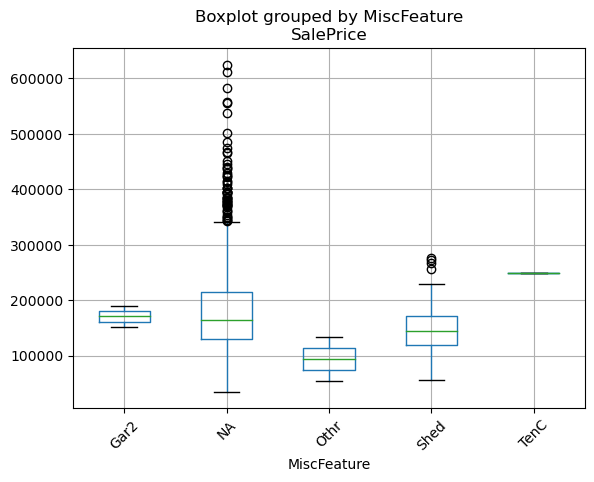

In [157]:
print(train['MiscFeature'].value_counts())
train.boxplot('SalePrice', by='MiscFeature', rot=45)

In [158]:
train.drop('MiscFeature', axis=1, inplace=True)

In [159]:
train.drop('MiscVal', axis=1, inplace=True)

WD       1265
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='SaleType'>

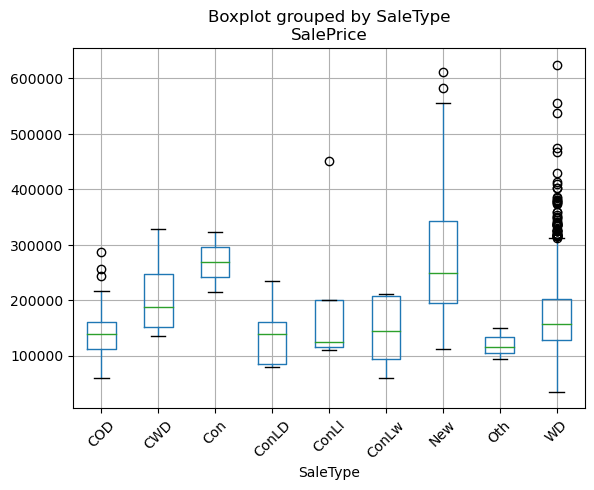

In [160]:
print(train['SaleType'].value_counts())
train.boxplot('SalePrice', by='SaleType', rot=45)

In [161]:
train.drop('SaleType', axis=1, inplace=True)

Normal     1197
Partial     123
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='SaleCondition'>

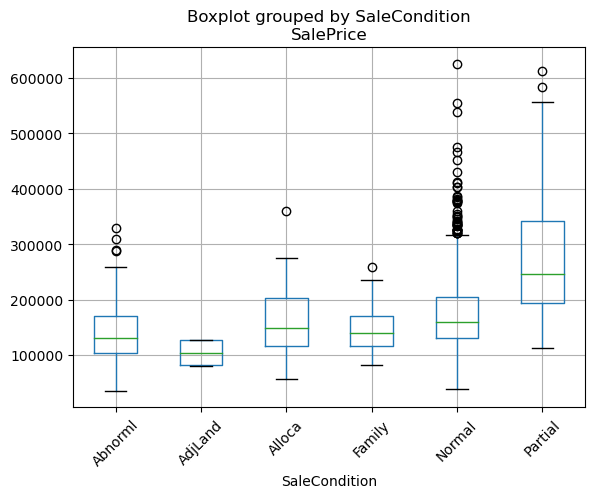

In [162]:
print(train['SaleCondition'].value_counts())
train.boxplot('SalePrice', by='SaleCondition', rot=45)

In [163]:
train.drop('SaleCondition', axis=1, inplace=True)

In [164]:
train.drop('Id', axis=1, inplace=True)

In [165]:
train.drop('LotFrontage', axis=1, inplace=True)

In [166]:
train.drop('MSSubClass', axis=1, inplace=True)

In [167]:
train = train.loc[train['MSZoning'].isin(['RH', 'RL', 'RP', 'RM'])]

In [168]:
train.drop('MSZoning', axis=1, inplace=True)

/var/folders/5j/zxljzwc916b6zz6z50f_wy740000gn/T/ipykernel_55408/2943422190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('MSZoning', axis=1, inplace=True)


In [169]:
train.drop('Street', axis=1, inplace=True)

/var/folders/5j/zxljzwc916b6zz6z50f_wy740000gn/T/ipykernel_55408/3738188313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Street', axis=1, inplace=True)


In [170]:
train = train[train['GrLivArea'] <= 4000]

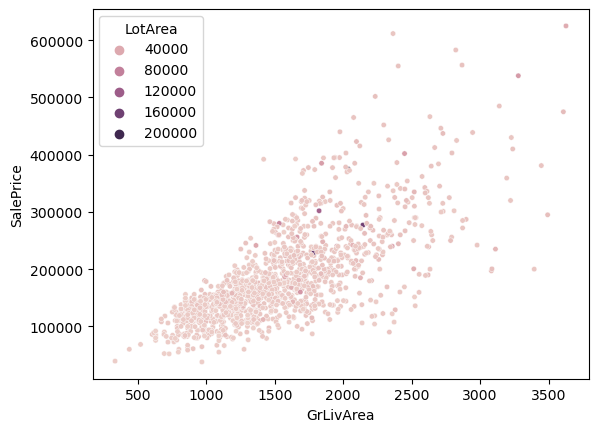

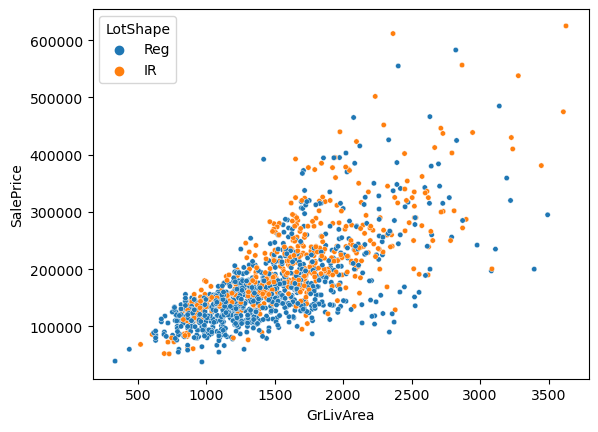

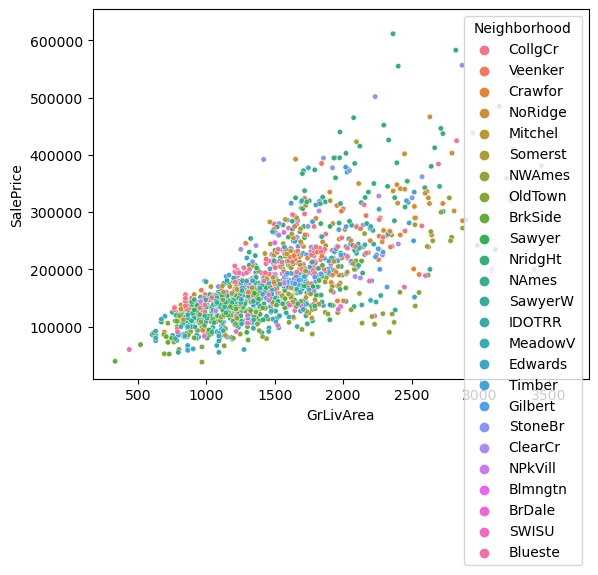

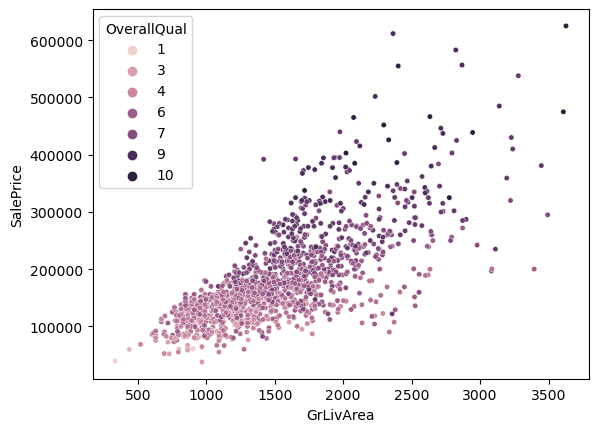

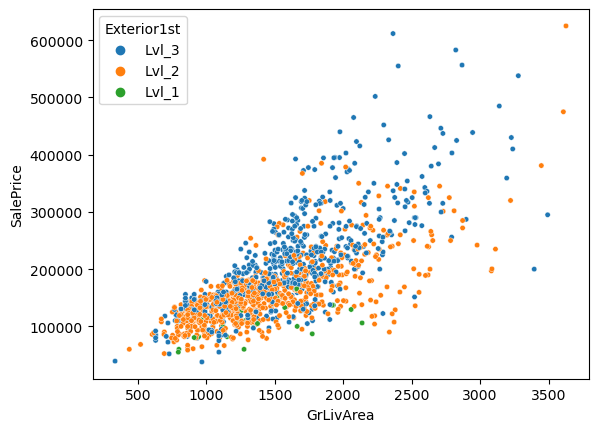

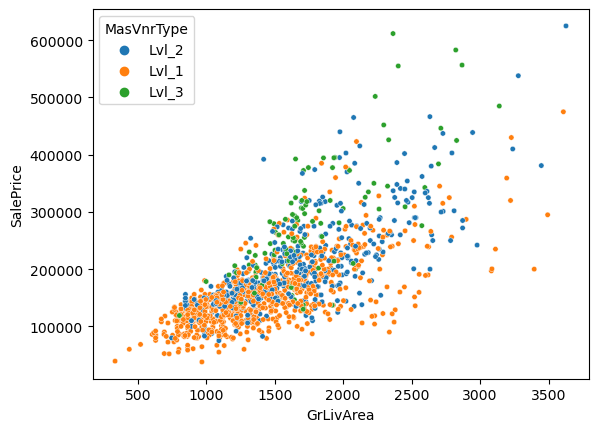

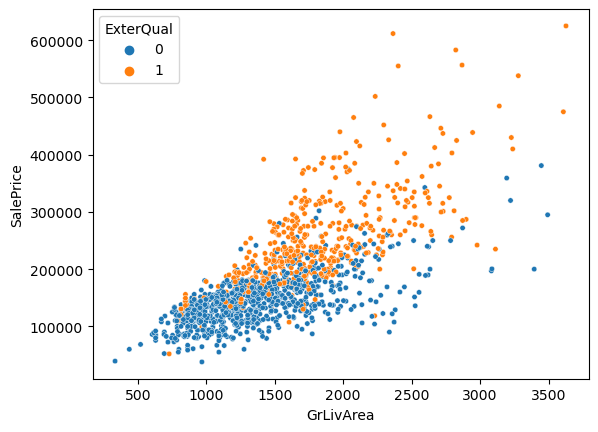

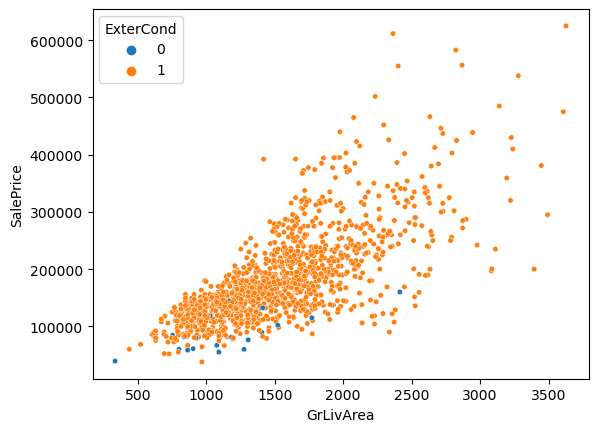

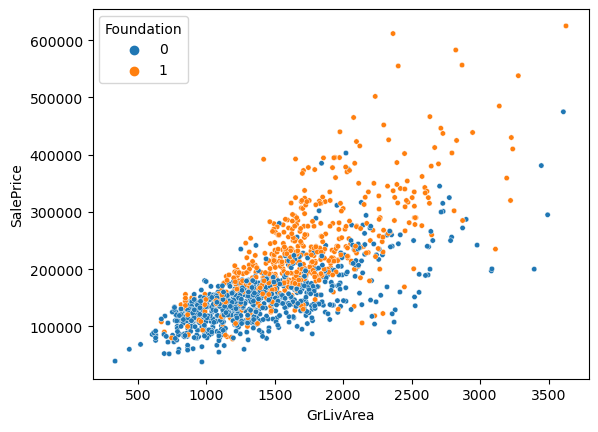

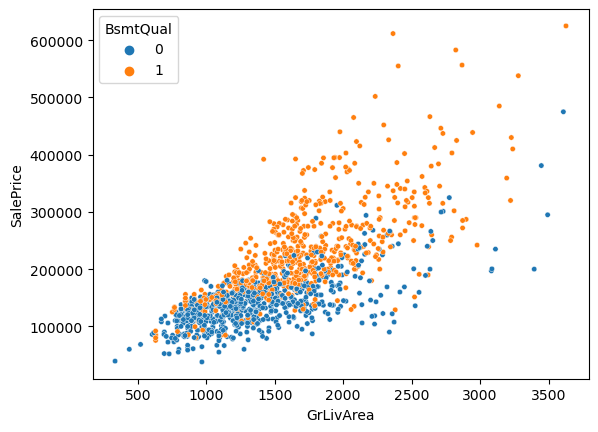

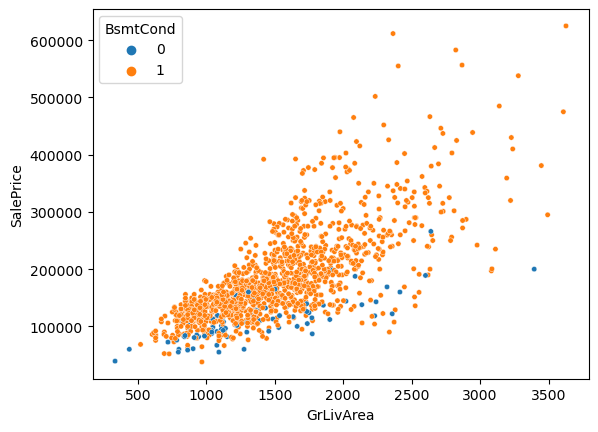

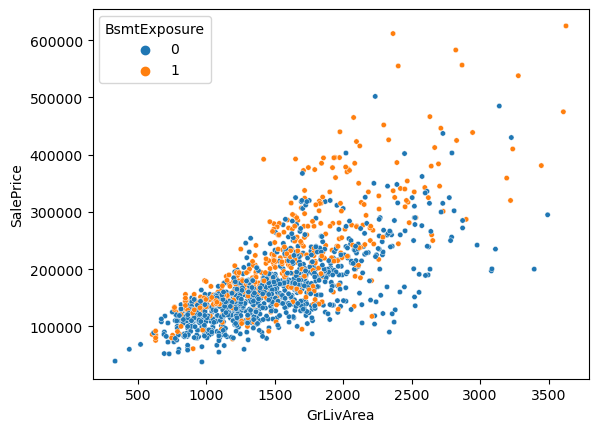

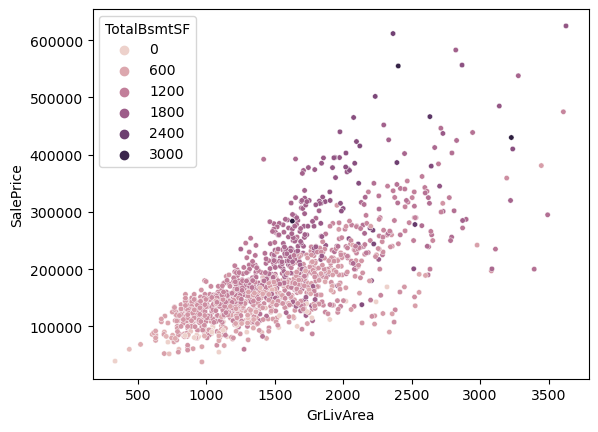

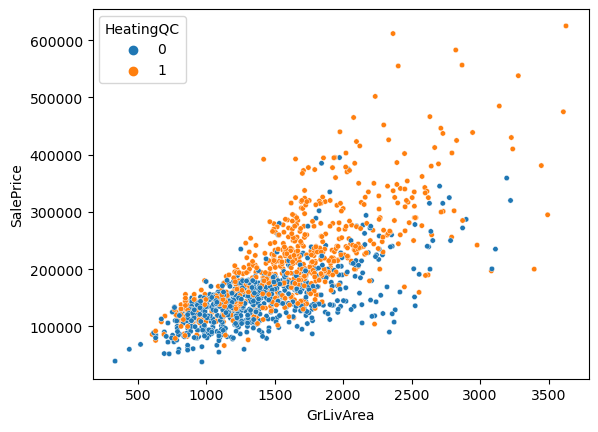

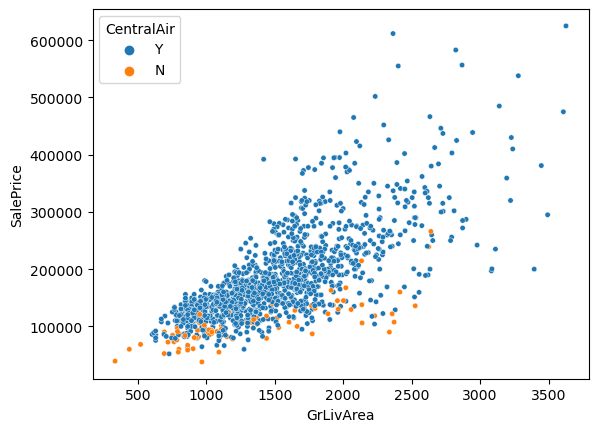

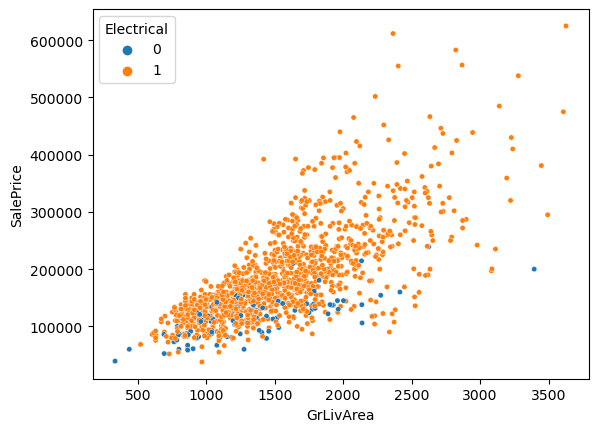

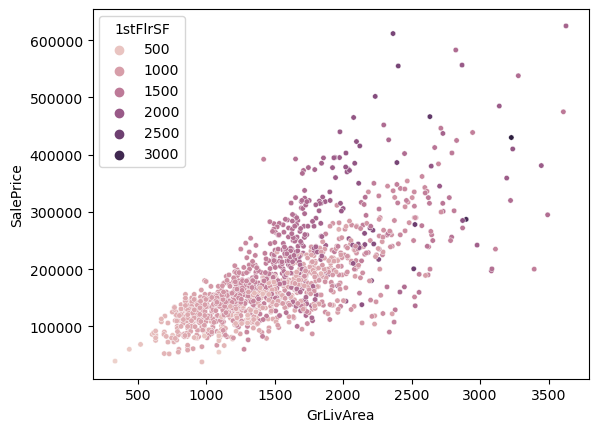

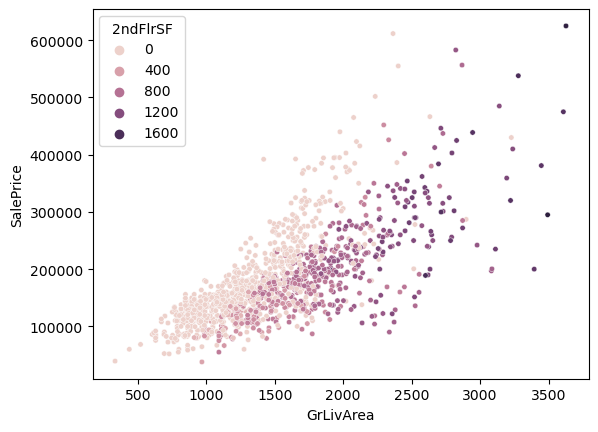

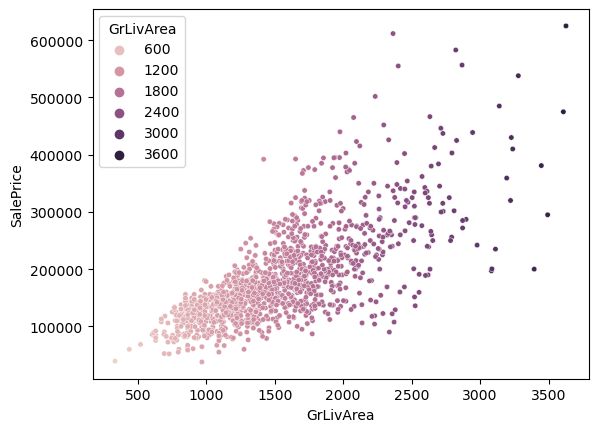

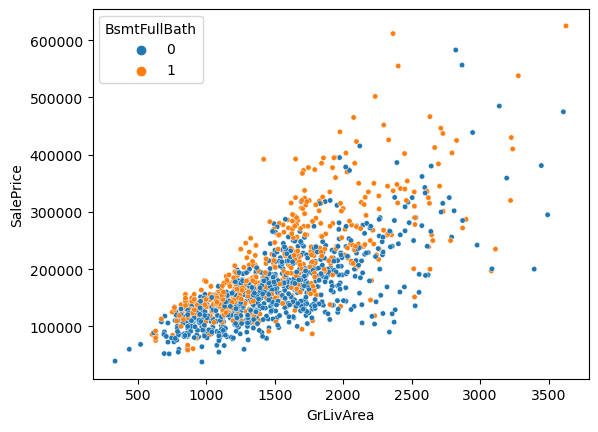

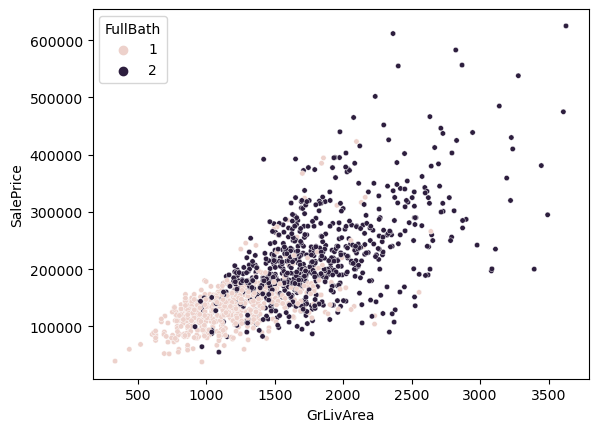

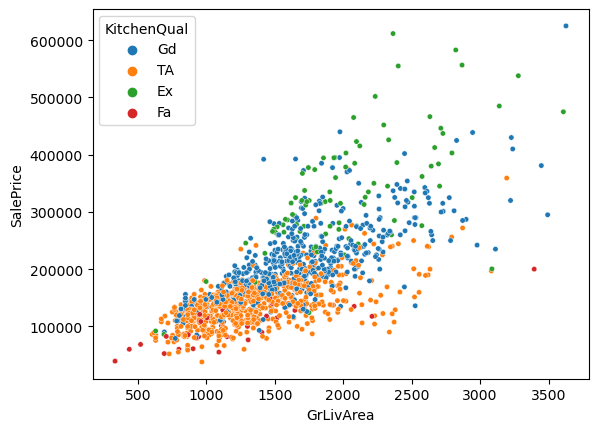

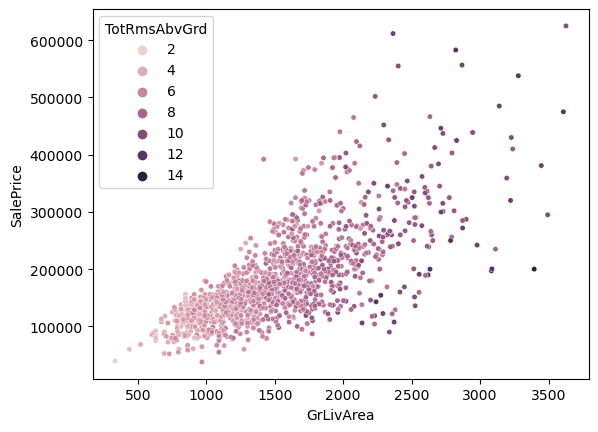

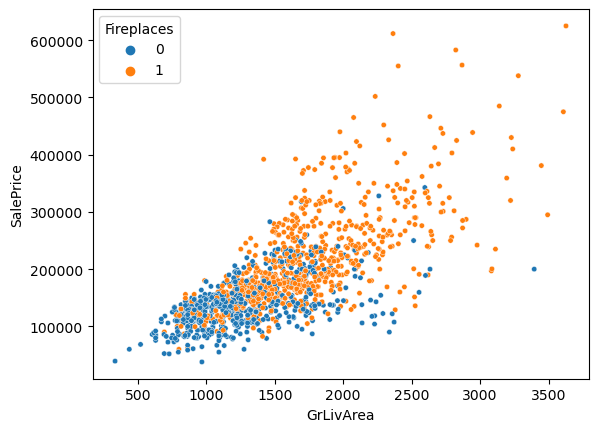

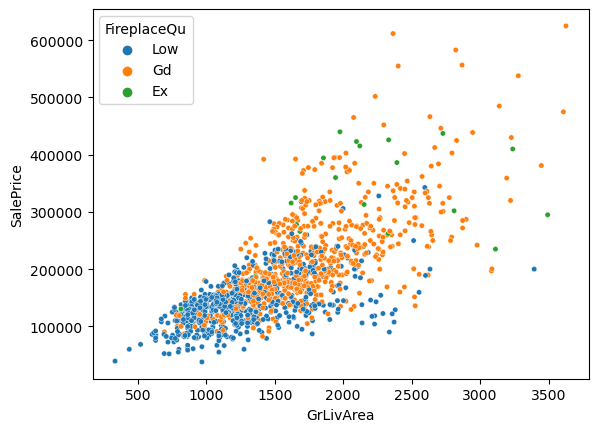

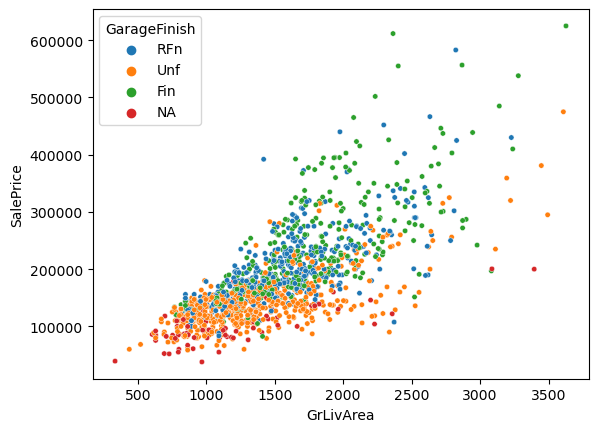

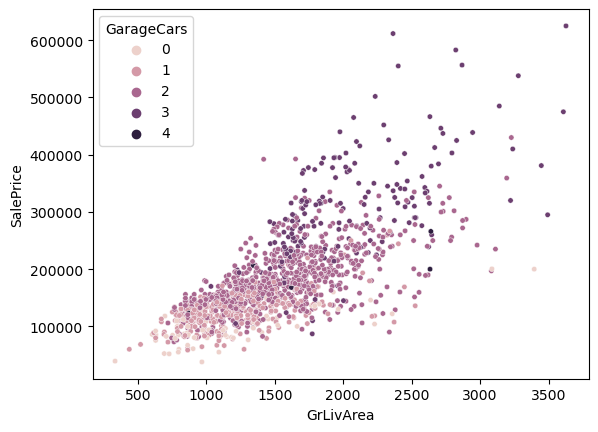

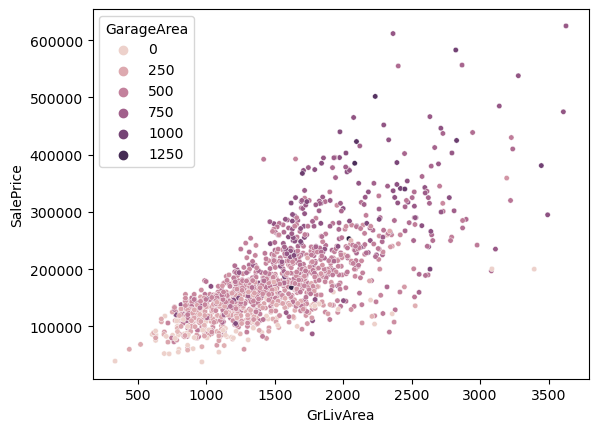

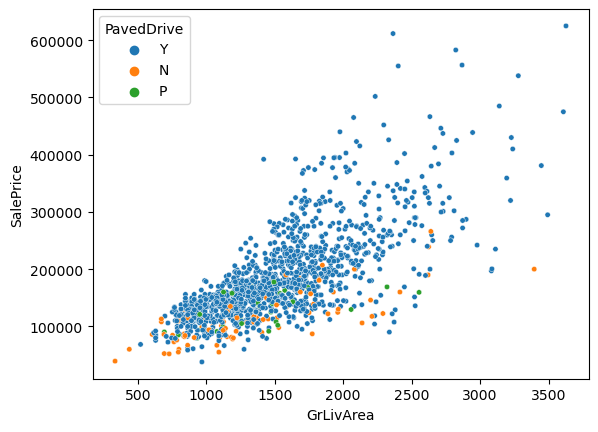

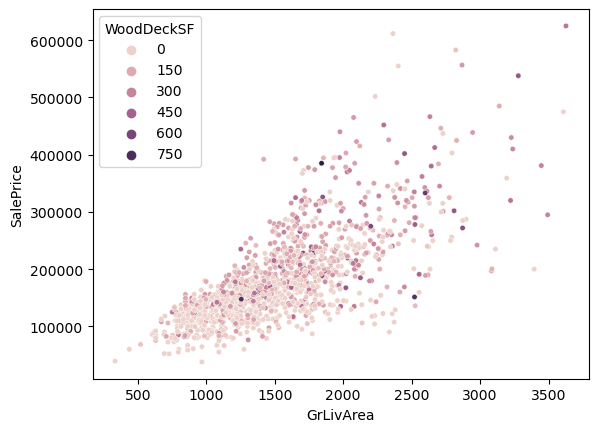

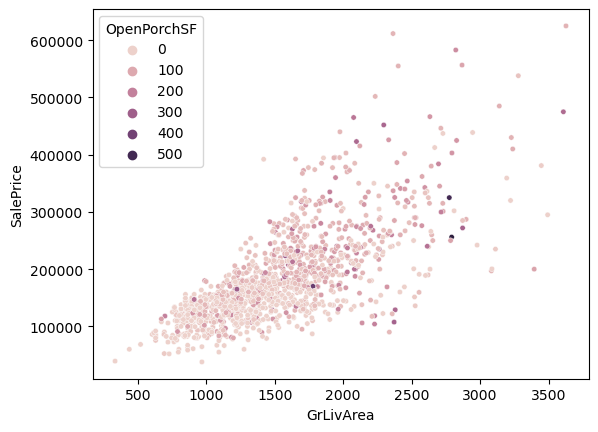

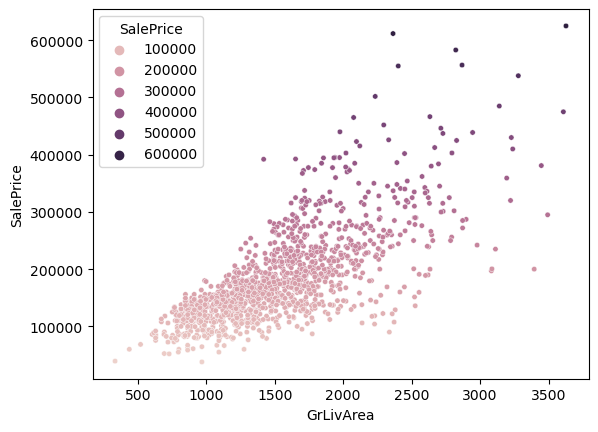

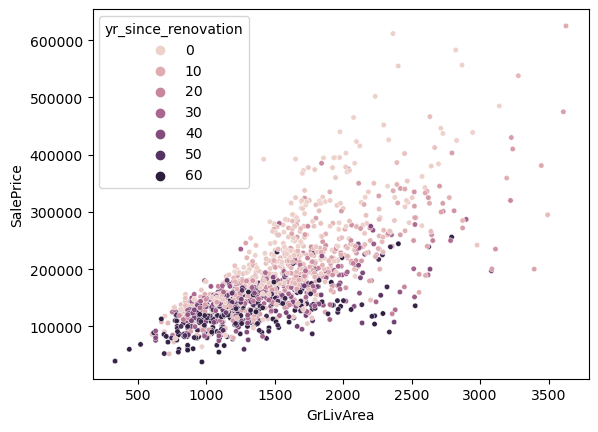

In [171]:
for col in list(train.columns):
    sns.scatterplot(x='GrLivArea', y='SalePrice', hue=col, s=15, data=train)
    plt.show()

/var/folders/5j/zxljzwc916b6zz6z50f_wy740000gn/T/ipykernel_55408/2487512661.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


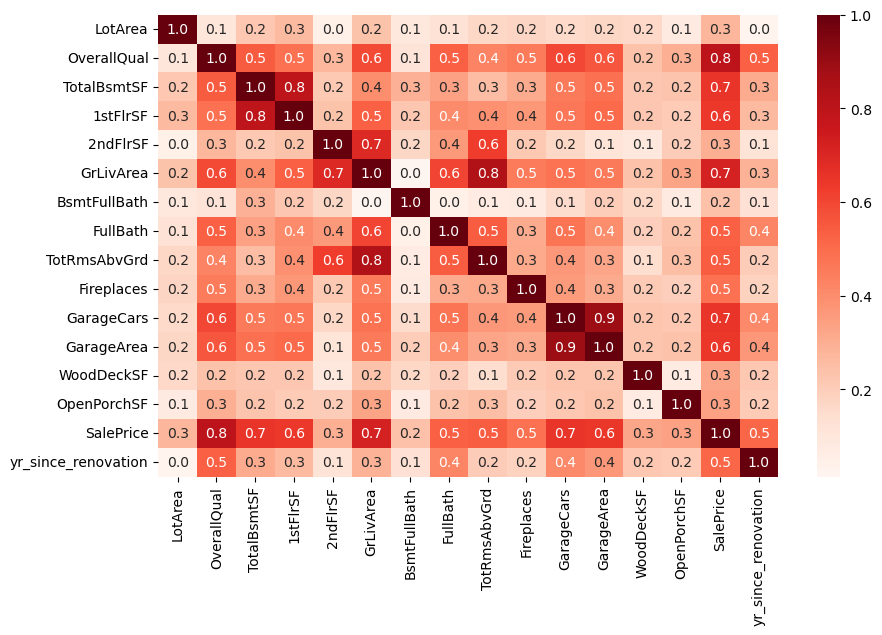

In [172]:
plt.figure(figsize=(10,6))
cor = train.corr()
cor = abs(cor)
sns.heatmap(cor, annot=True, fmt=".1f", cmap=plt.cm.Reds)
plt.show()

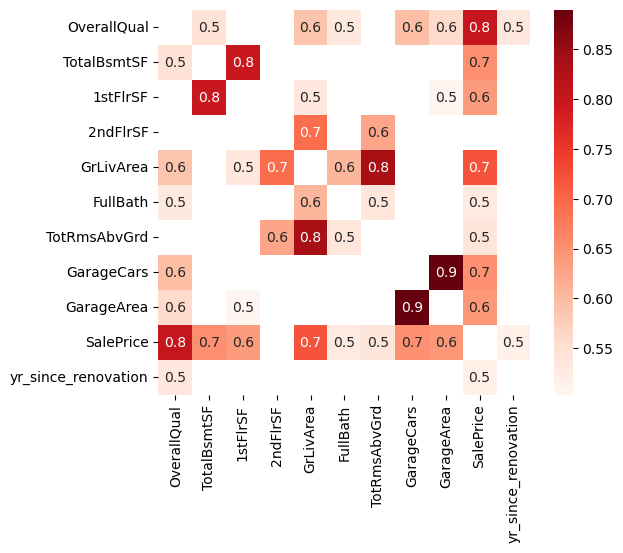

In [173]:
plt.figure(figsize=(6,5))
cor[cor == 1] = 0
cor = cor[cor>0.5]
cor2 = cor.dropna(how='all')
cor2 = cor2.dropna(axis = 1, how='all')
sns.heatmap(cor2, annot=True, fmt=".1f", cmap=plt.cm.Reds)
plt.show()

In [174]:
from catboost import Pool, CatBoostRegressor

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
def extract_cat_features(data):
    cat_features = []
    num_features = []
    for i, col in enumerate(data.columns):
        if data[col].dtype == 'object':
            cat_features.append(col)
        elif data[col].max() <= 15:
            cat_features.append(col)
        else:
            num_features.append(col)
    #cat_features.append('MSSubClass') #!! is numeric but represents categories
    return cat_features, num_features

In [178]:
def prepare_and_split_data(input_data, test_size=0):
    data = input_data.copy()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col].fillna('NA', inplace=True)
        else:
            data[col].fillna(0, inplace=True)
    X = data.drop('SalePrice', axis=1)
    y = data['SalePrice']
    if test_size > 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        return X_train, X_test, y_train, y_test
    else:
        return X, y

In [179]:
#train.drop(['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1, inplace=True)

In [180]:
cat_features, num_features = extract_cat_features(train)

In [181]:
X_train, X_test, y_train, y_test = prepare_and_split_data(train, test_size=.25)

In [182]:
#test = pd.read_csv('test_processed.csv')

In [183]:
# initialize Pool
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_features)

#test_pool = Pool(test, 
#                 cat_features=cat_features) 

eval_pool = Pool(X_test, 
                 y_test, 
                 cat_features=cat_features)

# specify the training parameters 
model = CatBoostRegressor(iterations=1000, 
                          depth=5, 
                          learning_rate=0.1, 
                          loss_function='RMSE',
                          l2_leaf_reg=4,
                          one_hot_max_size=30,
                          #od_type = "Iter",
                          #od_wait = 100,
                          random_state=42,
                          verbose=50
                          )
#train the model
model.fit(train_pool, eval_set=eval_pool, early_stopping_rounds=20)
# make the prediction using the resulting model
#preds = model.predict(test_pool)

0:	learn: 74196.4327223	test: 67209.5680605	best: 67209.5680605 (0)	total: 59ms	remaining: 59s
50:	learn: 23254.6365543	test: 26226.6963293	best: 26226.6963293 (50)	total: 97.5ms	remaining: 1.81s
100:	learn: 18973.4646353	test: 23636.6526130	best: 23621.3916498 (99)	total: 136ms	remaining: 1.21s
150:	learn: 16068.2140572	test: 22557.1800895	best: 22542.3526951 (148)	total: 175ms	remaining: 986ms
200:	learn: 14138.8410338	test: 22066.9872127	best: 22066.9872127 (200)	total: 214ms	remaining: 852ms
250:	learn: 12739.2577288	test: 21765.0083856	best: 21756.3021874 (247)	total: 251ms	remaining: 748ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 21749.66883
bestIteration = 269

Shrink model to first 270 iterations.


In [184]:
#np.sqrt(mean_squared_error(preds, y_test))

In [185]:
#train.drop(['LotArea', 'BsmtFullBath', 'WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

In [186]:
#train.drop(['has_wood_deck', 'has_open_porch'], axis=1, inplace=True)

In [187]:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0             GrLivArea    15.507054
1            GarageCars    14.412927
2             ExterQual    10.068094
3              1stFlrSF     8.868399
4           TotalBsmtSF     7.819870
5           KitchenQual     5.718341
6           FireplaceQu     5.319970
7               LotArea     4.931706
8   yr_since_renovation     4.181915
9           OverallQual     3.033679
10         Neighborhood     2.681150
11             BsmtQual     2.468347
12             2ndFlrSF     2.007656
13           GarageArea     1.986188
14         GarageFinish     1.626708
15         BsmtFullBath     1.505913
16         BsmtExposure     1.264856
17           MasVnrType     1.102101
18           WoodDeckSF     1.012690
19             FullBath     0.920452
20          Exterior1st     0.689639
21          OpenPorchSF     0.630095
22             BsmtCond     0.522601
23           CentralAir     0.422474
24         TotRmsAbvGrd     0.393987
25           PavedDrive     0.257514
26           Foundation     0.172721
27             LotShape     0.154094
28           Electrical     0.102217
29            HeatingQC     0.080346
30            ExterCond     0.071035
31           Fireplaces     0.065261

In [188]:
#test_id = pd.read_csv('test.csv')

In [189]:
#sub_test = test_id.copy()

In [190]:
#sub_test['SalePrice'] = pd.Series(preds)

In [191]:
#sub_test[['Id', 'SalePrice']].to_csv('out.csv', index=False, )

In [192]:
#preds